In [1]:
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
import xlsxwriter

In [2]:
# read in the new cleaned datasheet
df = pd.read_excel('..\Data Cleanup\cleaned_data.xlsx', sheet_name = 'master')

In [3]:
data = df[(df['EffMeas'] == 'LR')]

In [4]:
data = data.drop('IndoorInterior', axis=1)
data = data.drop('IndoorExterior', axis=1)
data = data.drop('IndoorCarpet', axis=1)
data = data.drop('IndoorNonCarpet', axis=1)
data = data.drop('IndoorCeilings', axis=1)
data = data.drop('HVAC', axis=1)
data = data.drop('IndoorMisc', axis=1)
data = data.drop('OutdoorExterior', axis=1)
data = data.drop('Roofing', axis=1)
data = data.drop('Pavement', axis=1)
data = data.drop('Water', axis=1)
data = data.drop('Soil', axis=1)
data = data.drop('OutdoorMisc', axis=1)
data = data.drop('UndergroundInterior', axis=1)
data = data.drop('UndergroundCarpet', axis=1)
data = data.drop('UndergroundNonCarpet', axis=1)
data = data.drop('UndergroundCeilings', axis=1)
data = data.drop('UndergroundMisc', axis=1)

In [5]:
columnList = ['Category', 'Loading', 'ConcDose', 'ClO2', 'MB', 'H2O2', 'VolApp', 'Temp', 'RH', 'ContTime', 'Rinsate', 
              'TotalApp', 'NumDataPointsLoading', 'NumDataPointsConcDose', 'NumDataPointsClO2', 'NumDataPointsMB', 
              'NumDataPointsH2O2', 'NumDataPointsVolApp', 'NumDataPointsTemp', 'NumDataPointsRH', 'NumDataPointsContTime',
              'NumDataPointsRinsate', 'NumDataPointsTotalApp', 'PLoading', 'PConc', 'PClO2', 'PMB', 'PH2O2', 
              'PVolApp', 'PTemp', 'PRH', 'PContTime', 'PRinsate', 'PTotalApp']

surfaces = data.Surface.unique().tolist()

methods = data.AppMethod.unique().tolist()

In [6]:
correlationData = pd.DataFrame(columns = columnList)

C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


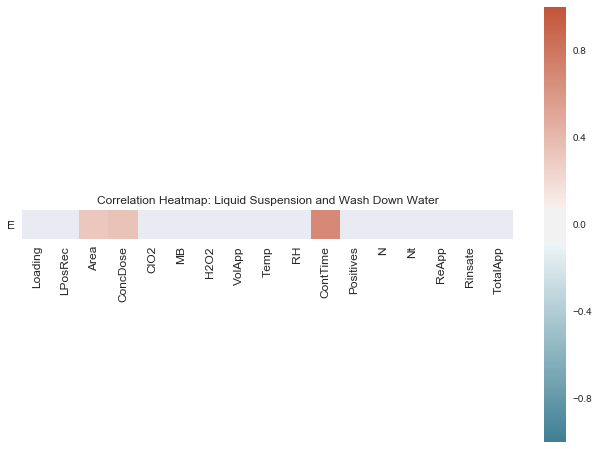

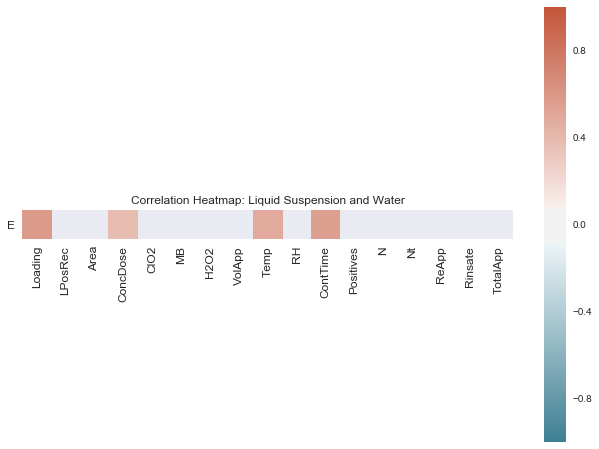

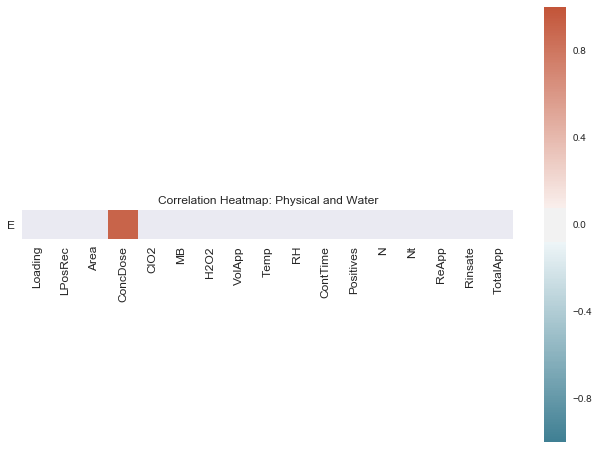

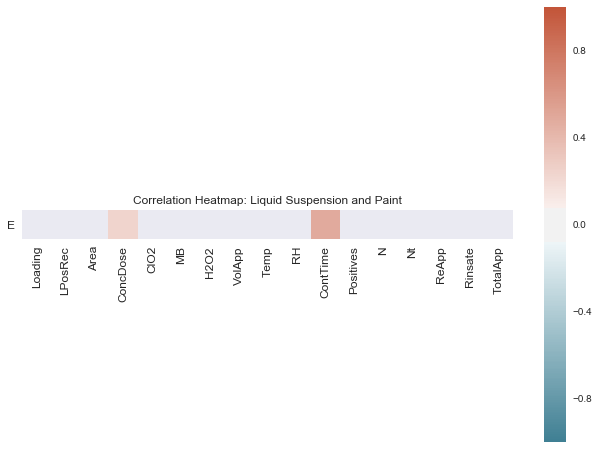

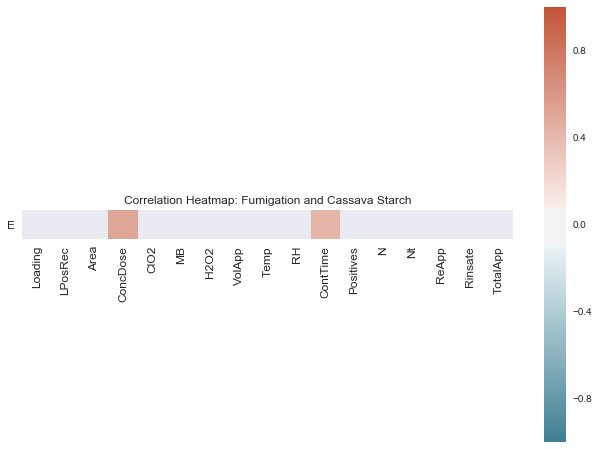

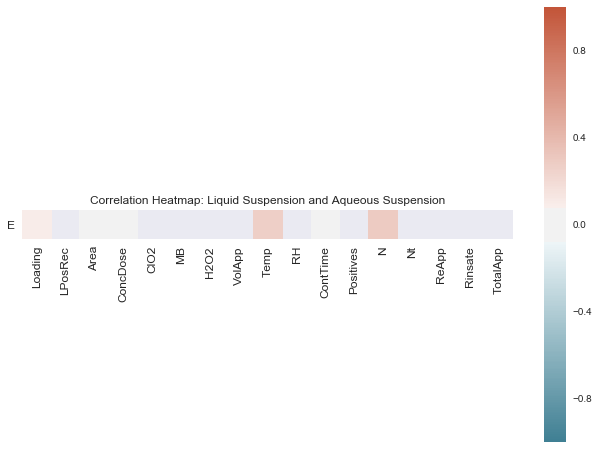

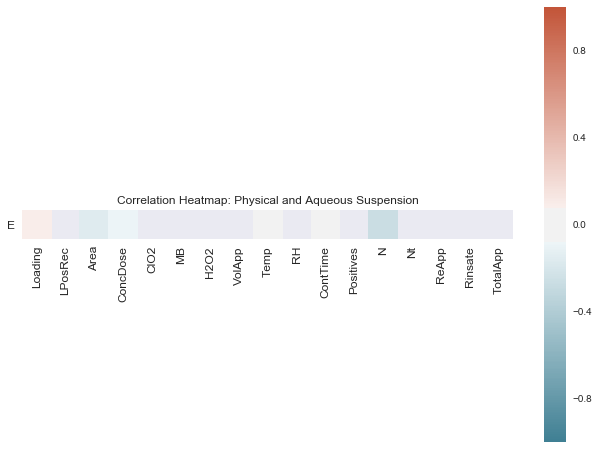

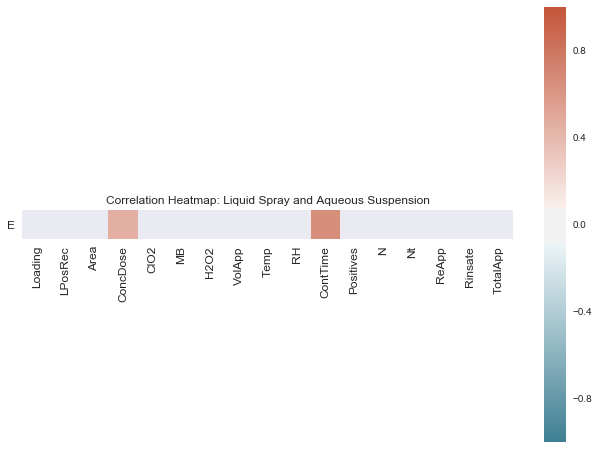

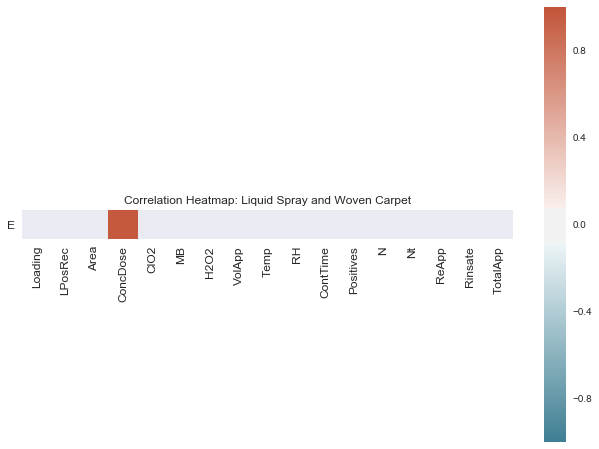

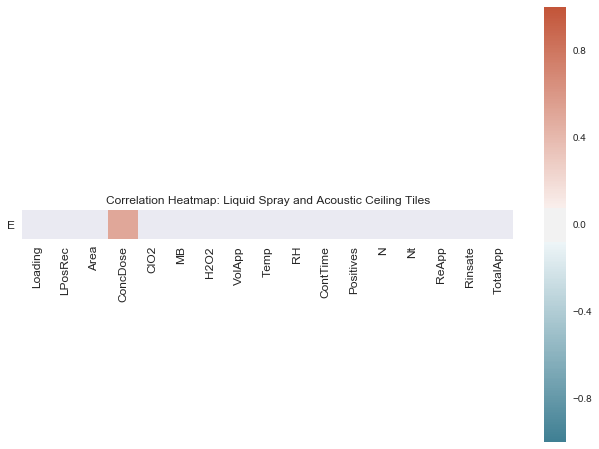

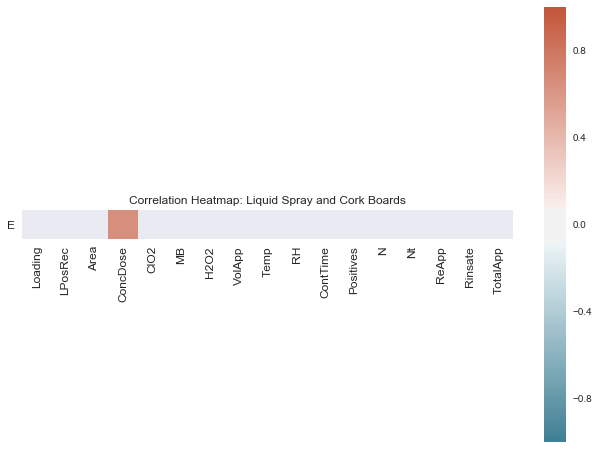

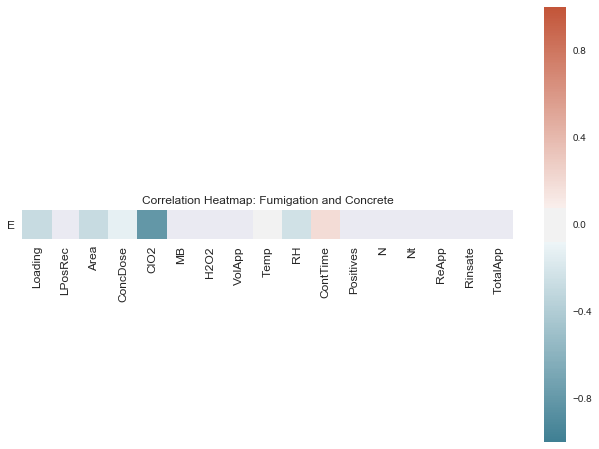

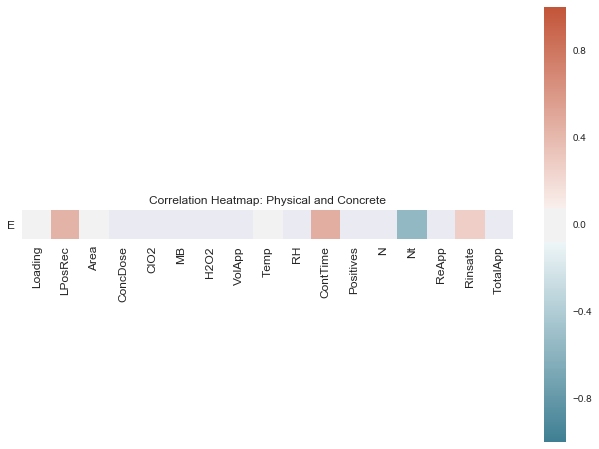

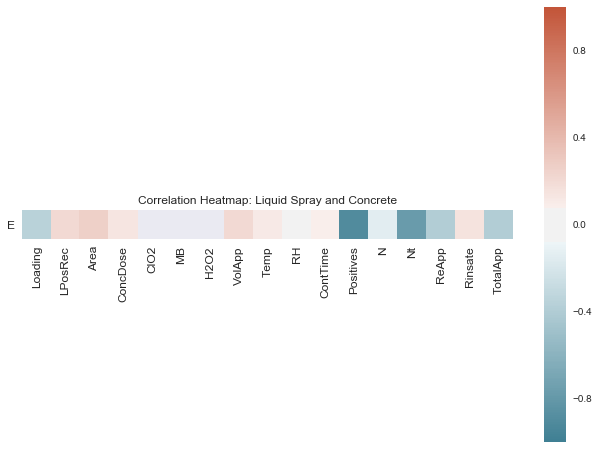

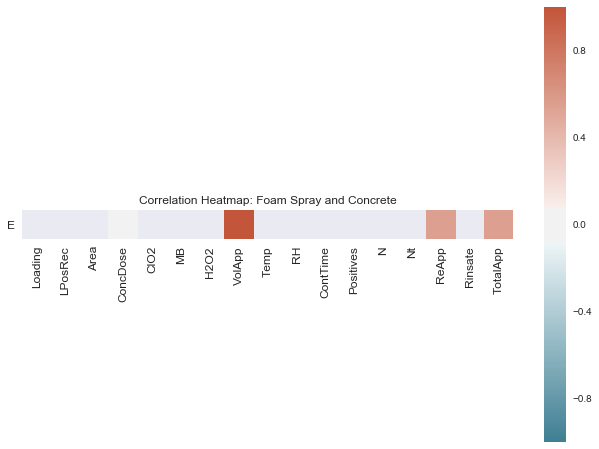

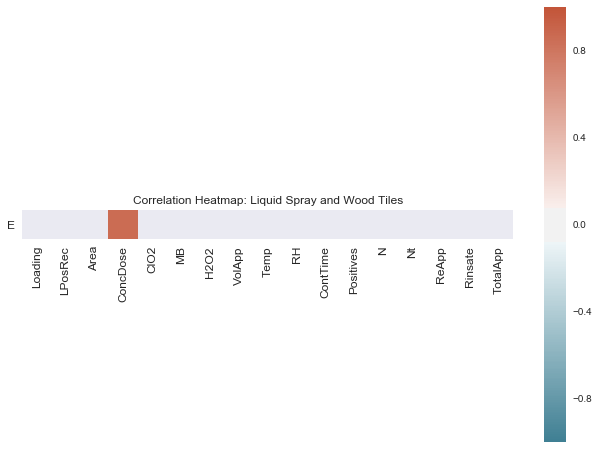

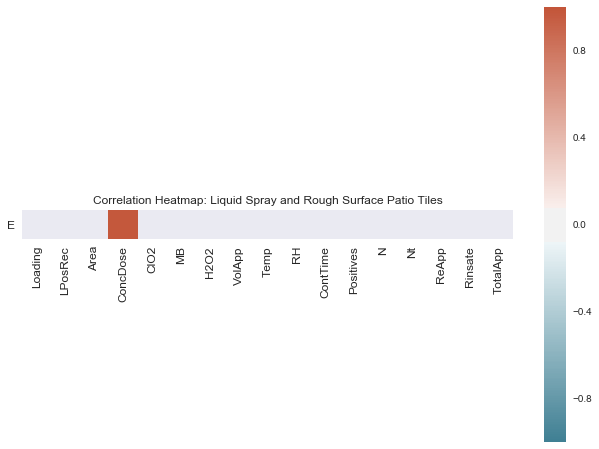

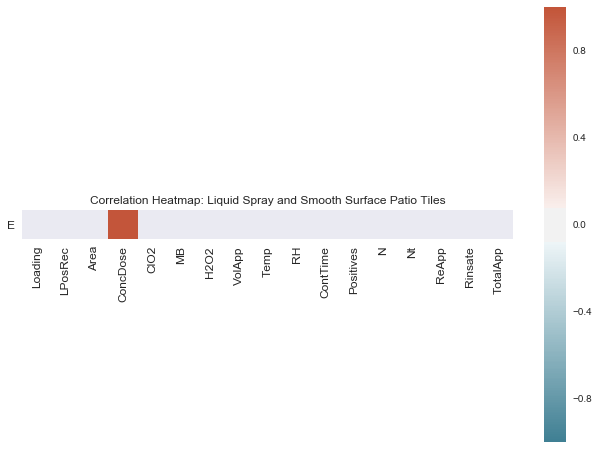

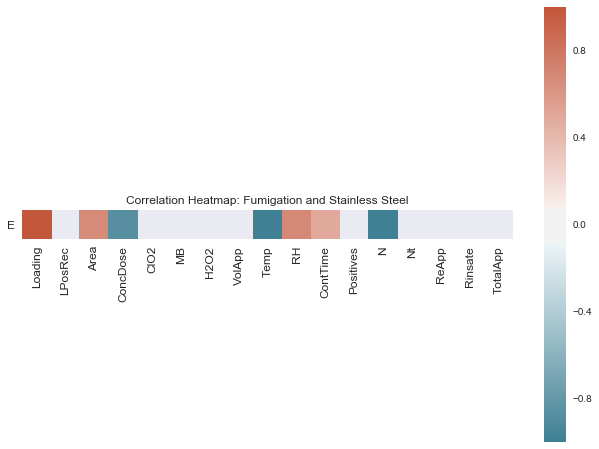

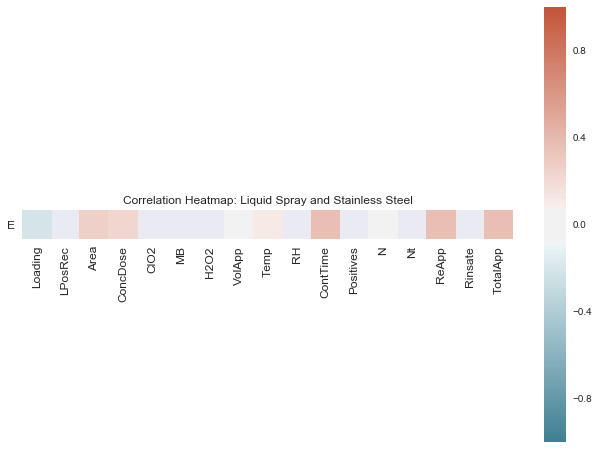

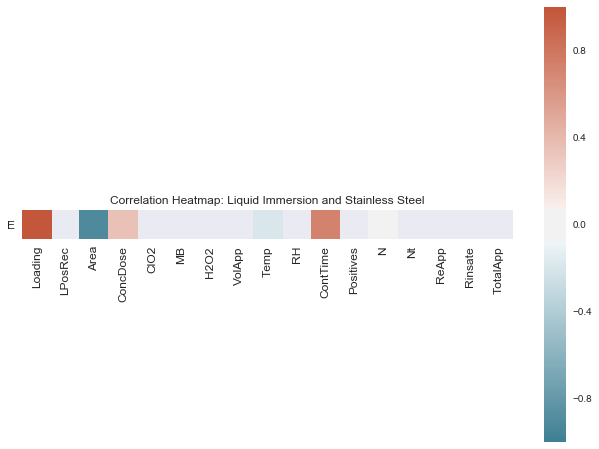

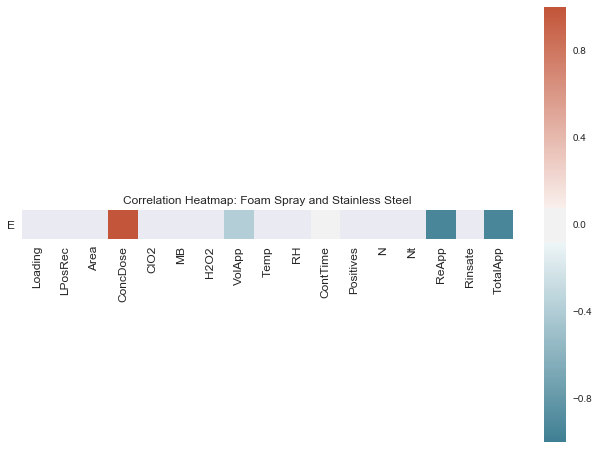

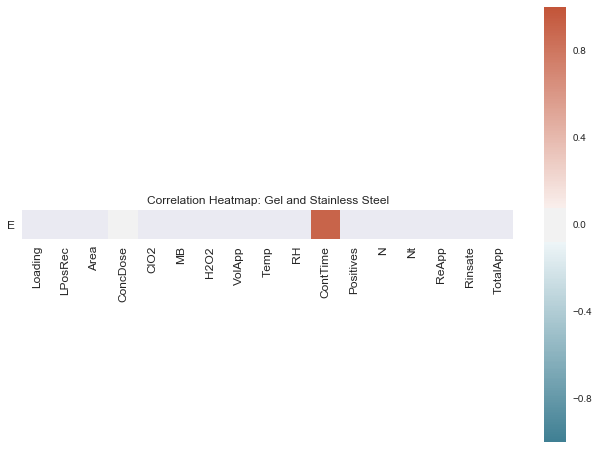

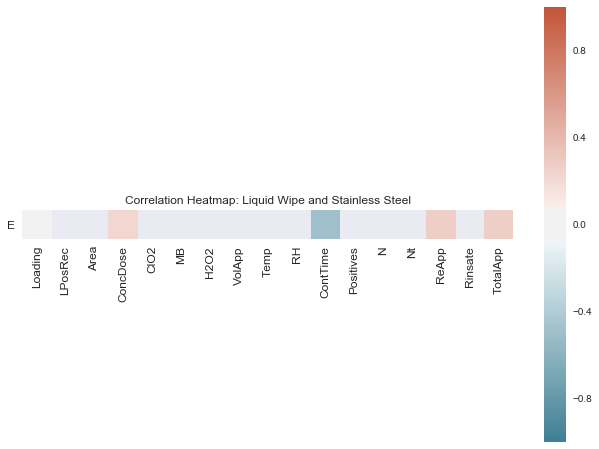

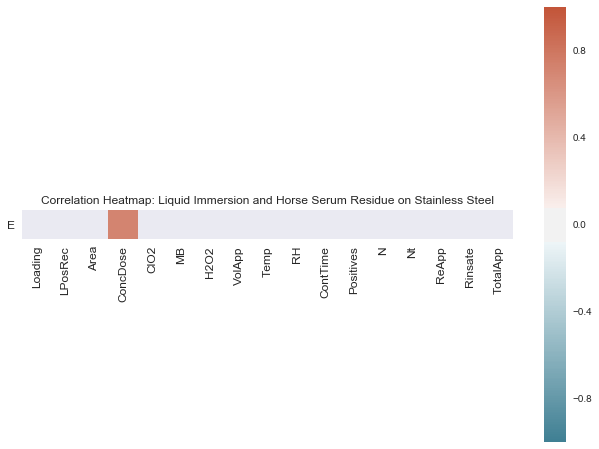

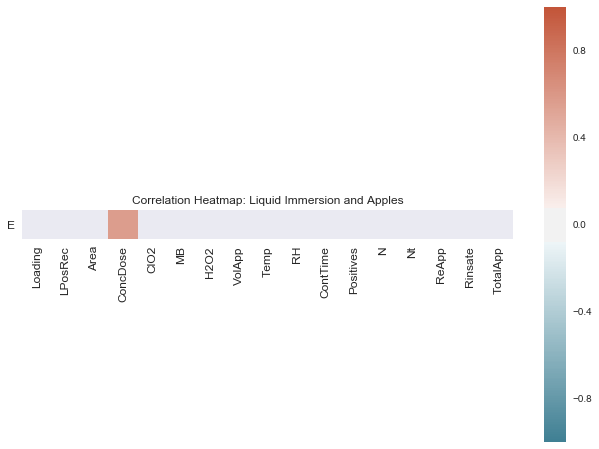

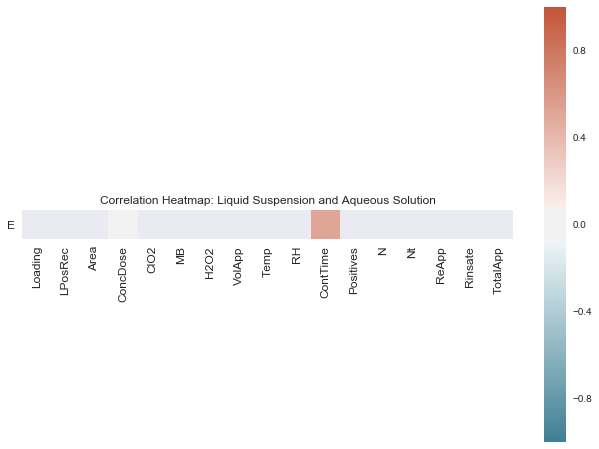

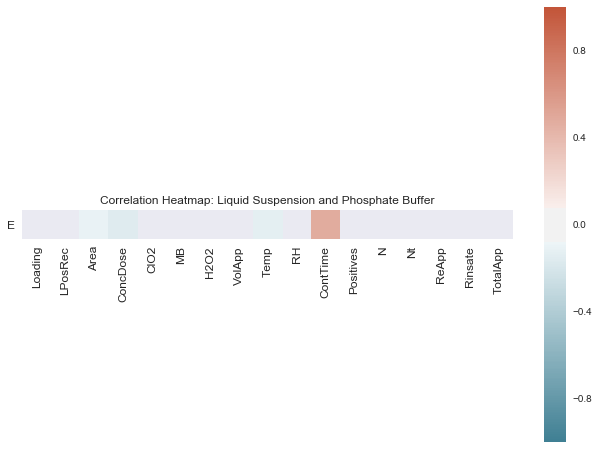

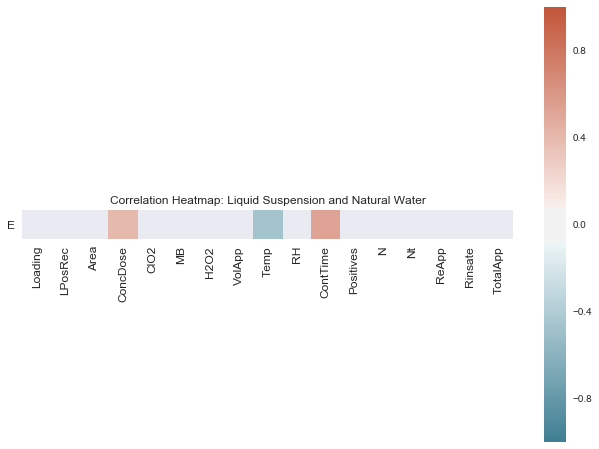

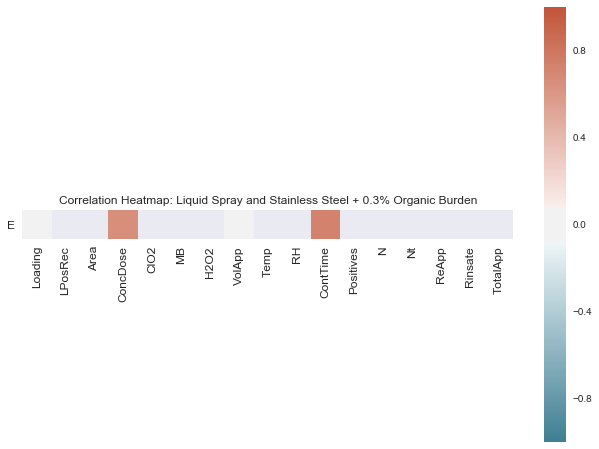

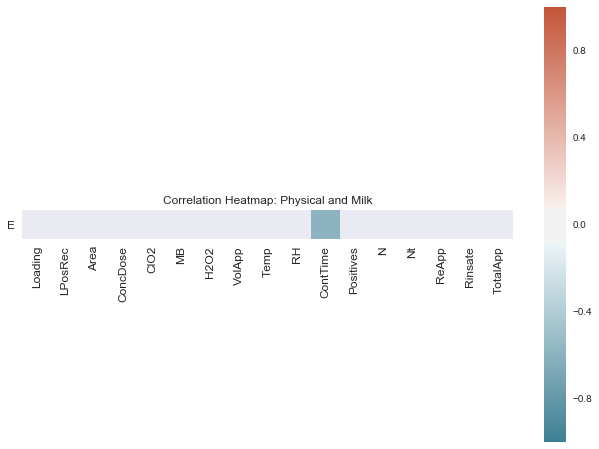

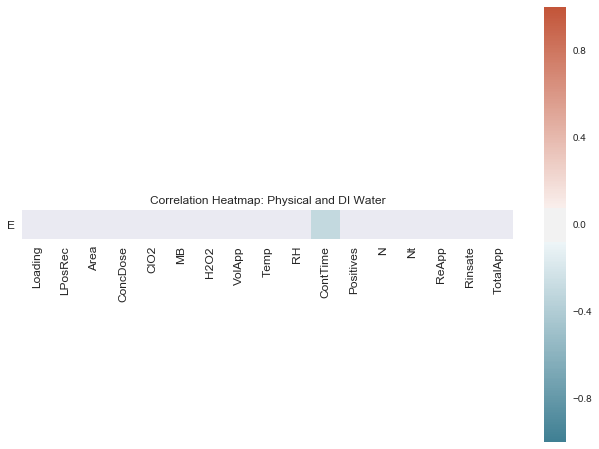

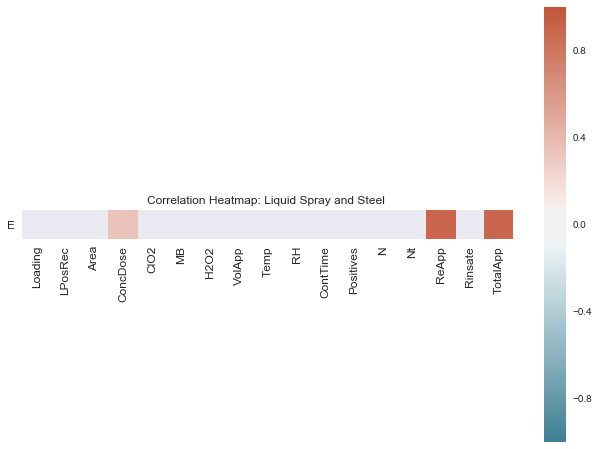

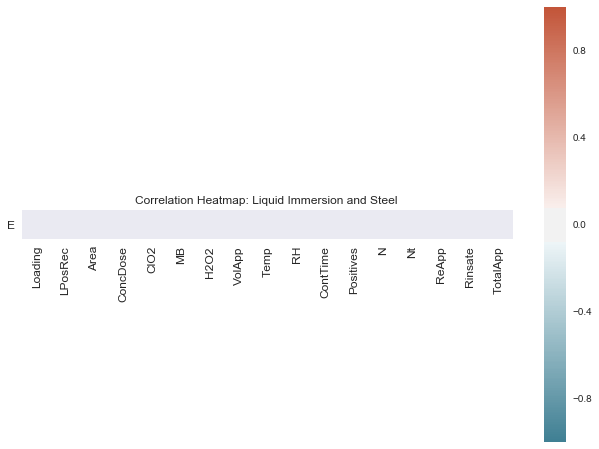

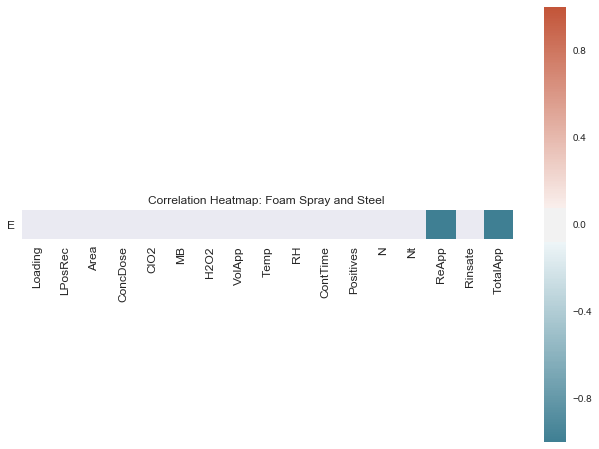

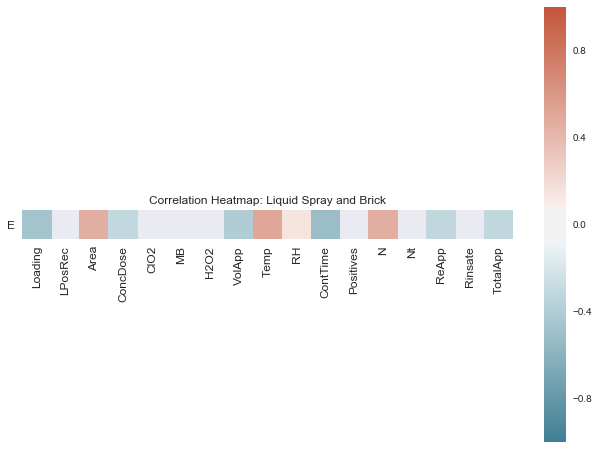

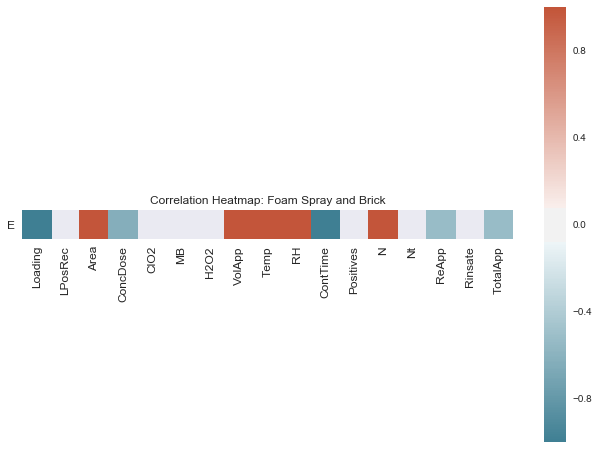

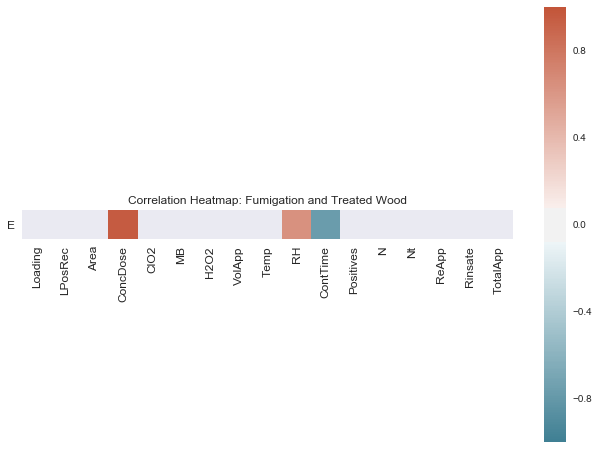

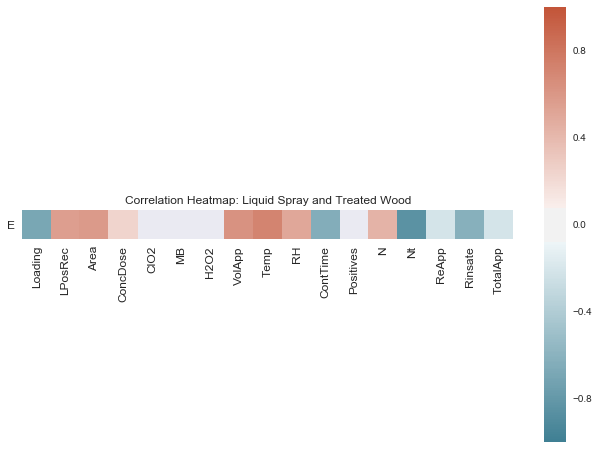

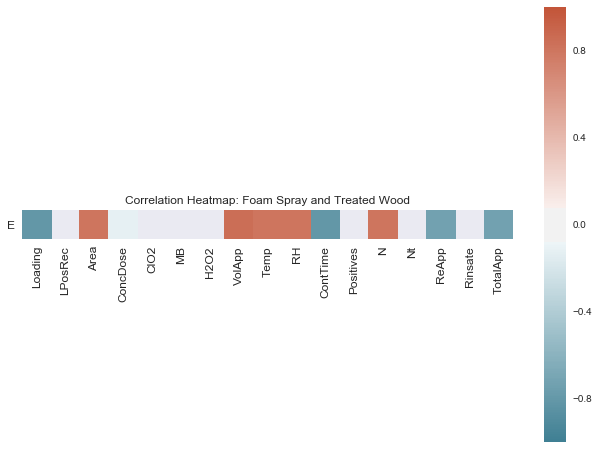

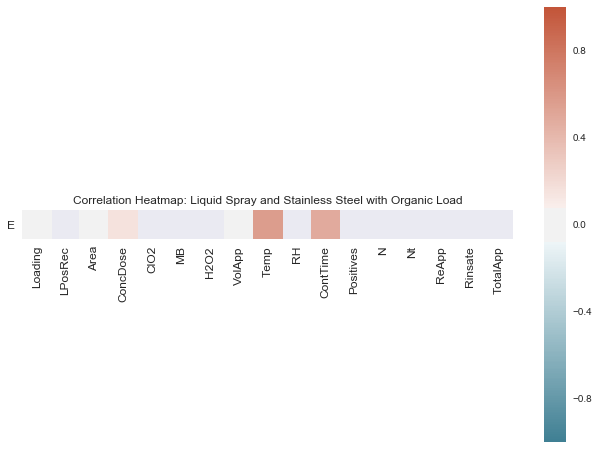

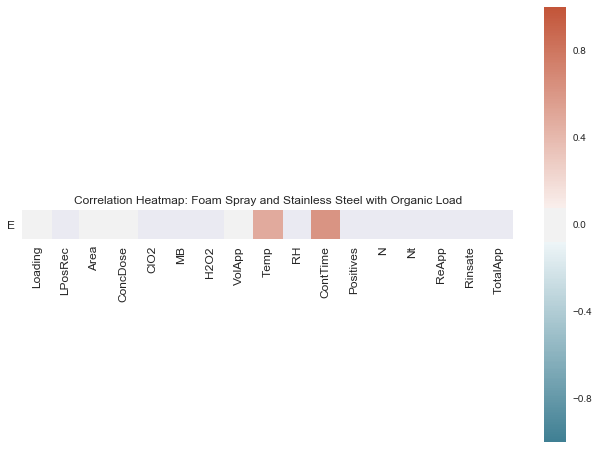

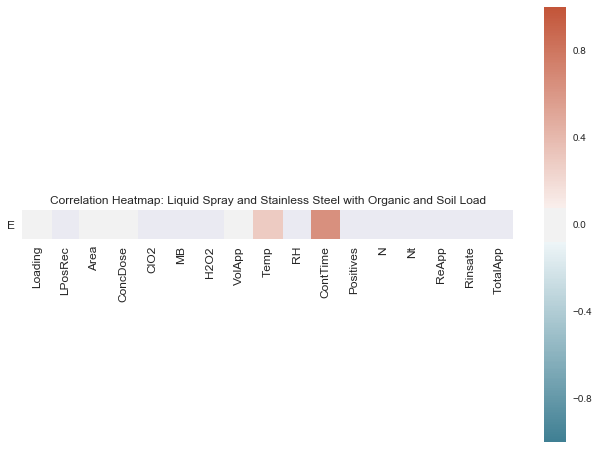

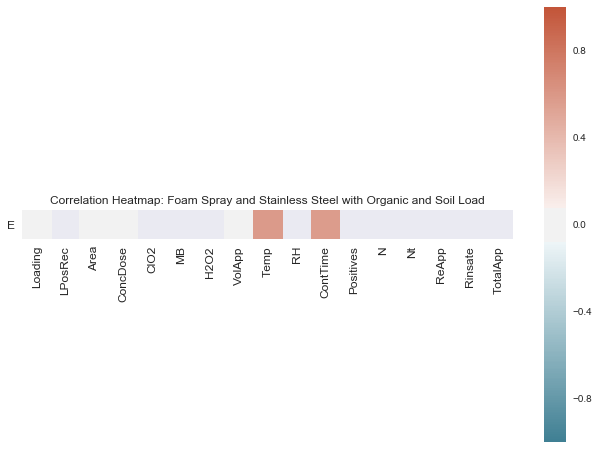

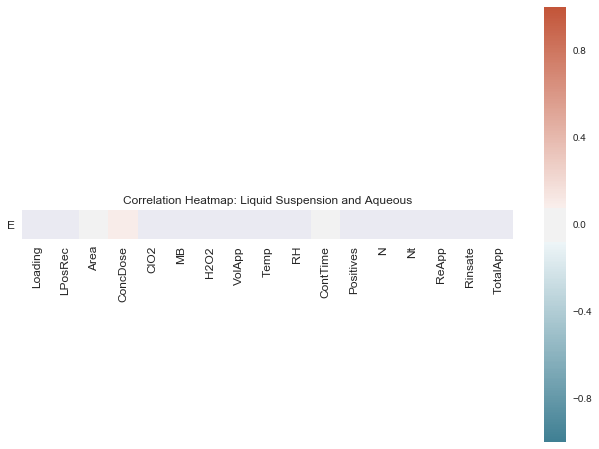

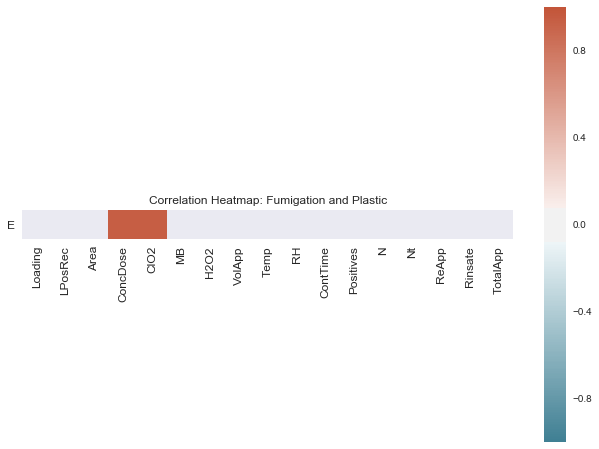

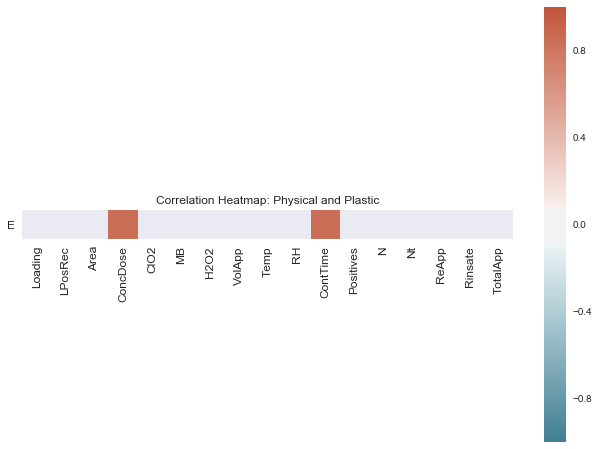

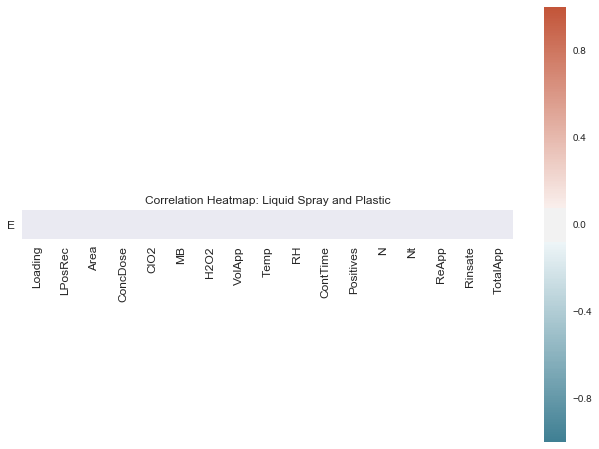

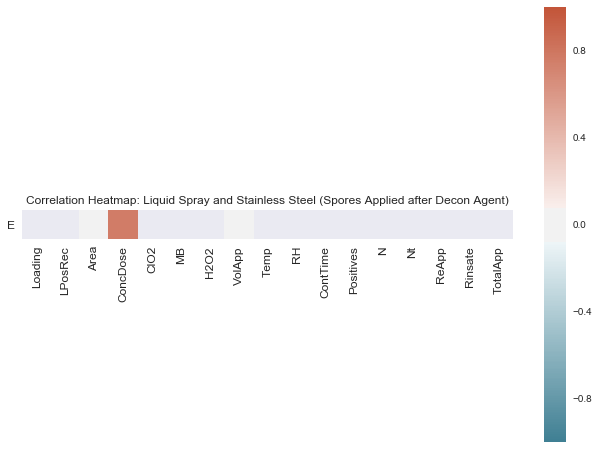

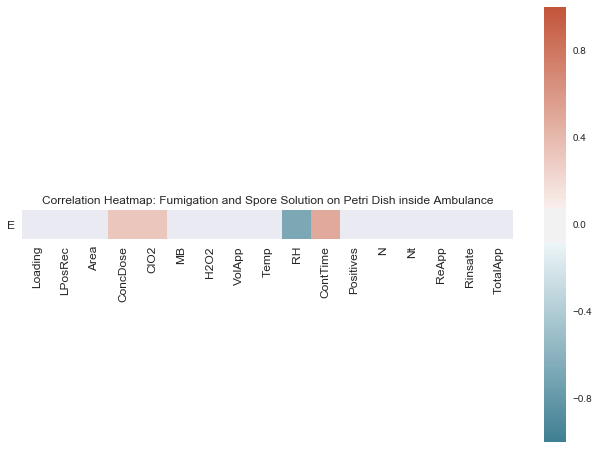

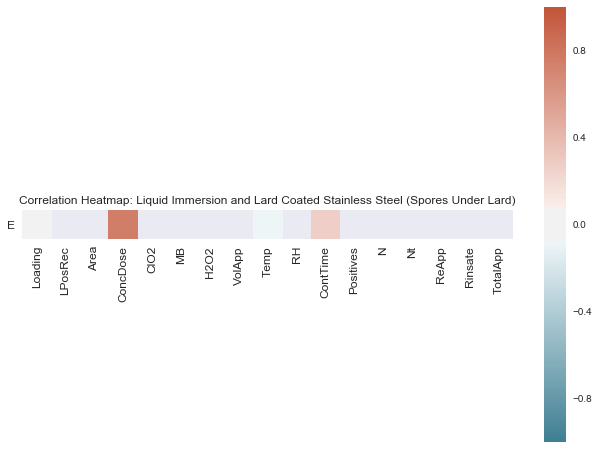

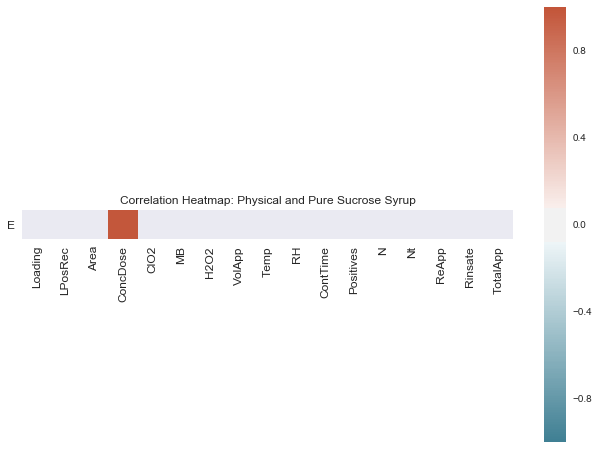

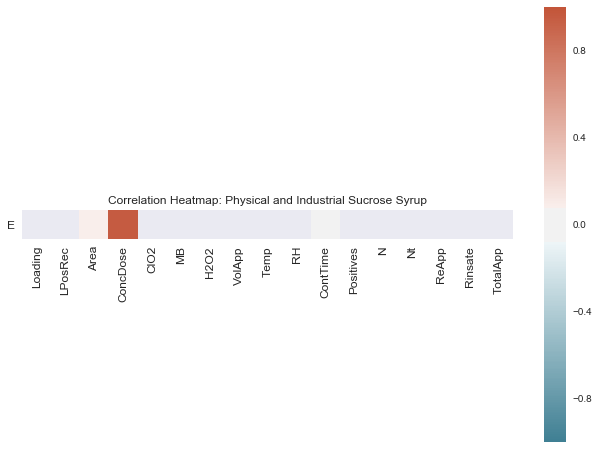

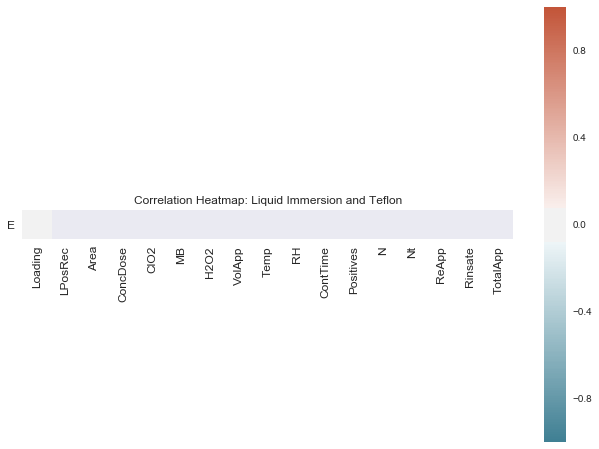

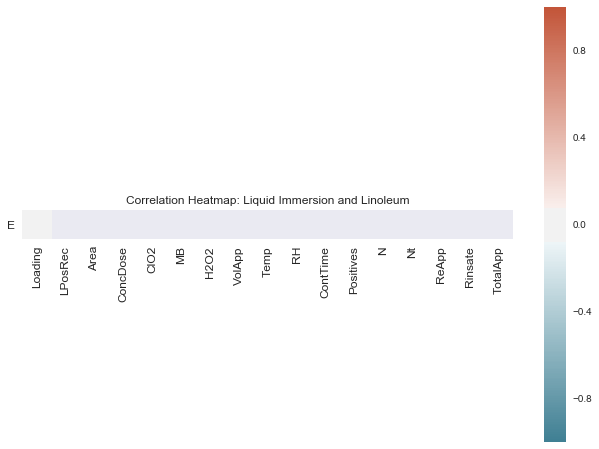

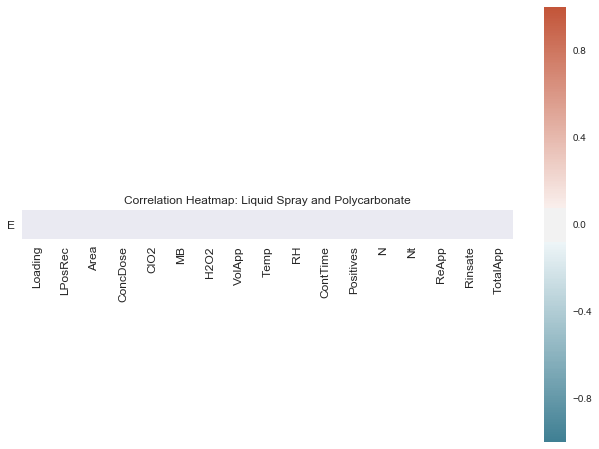

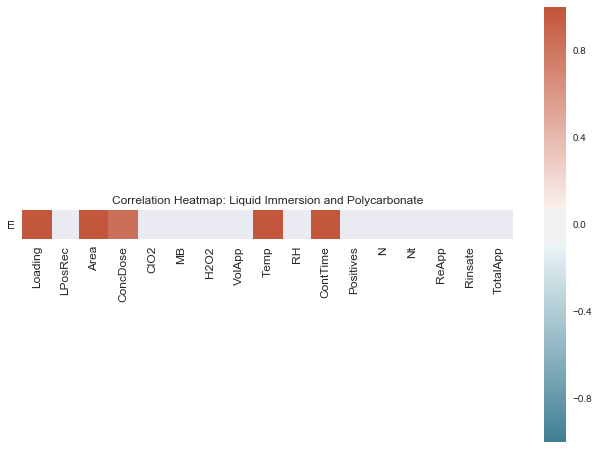

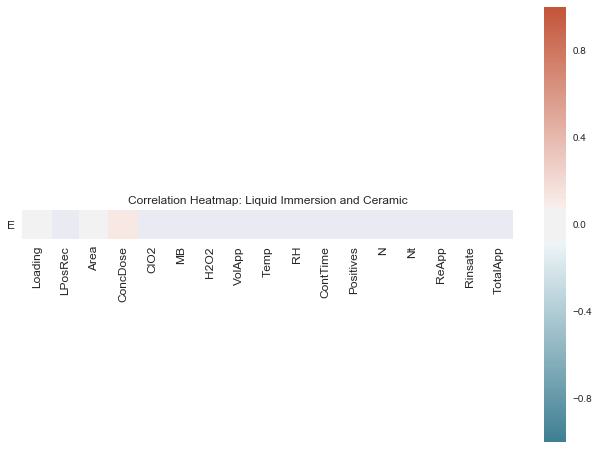

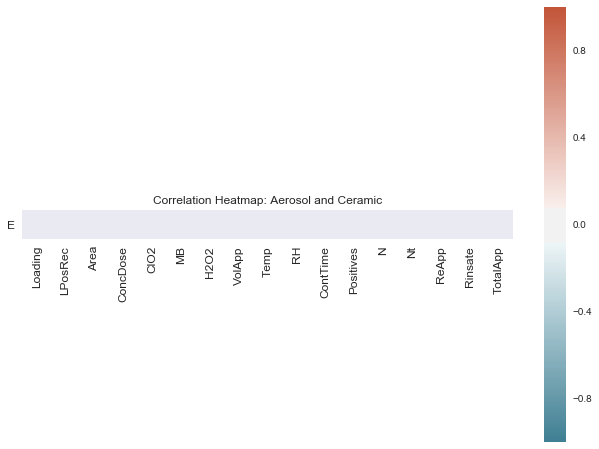

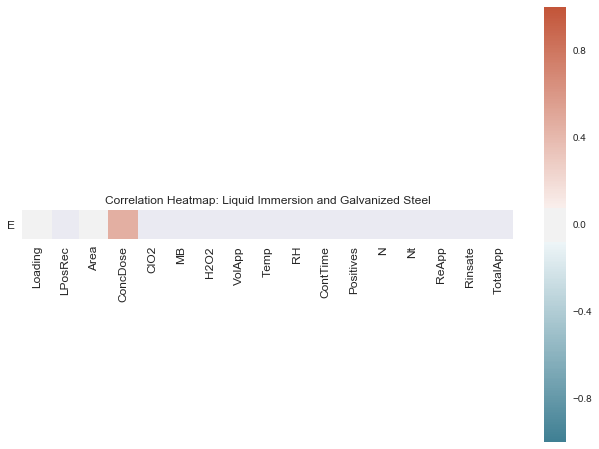

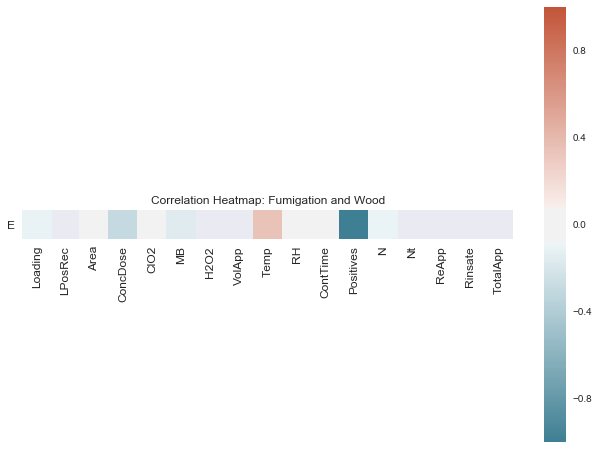

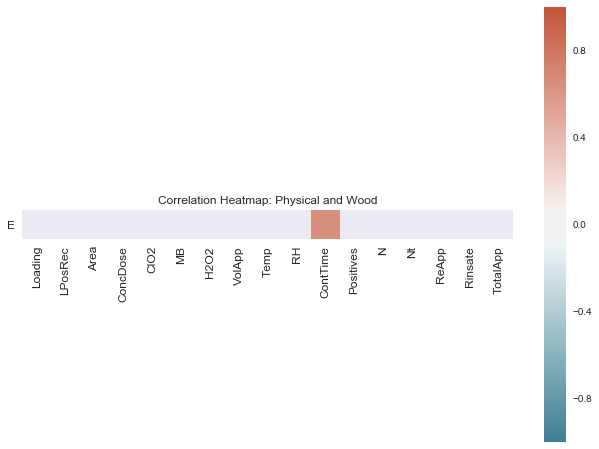

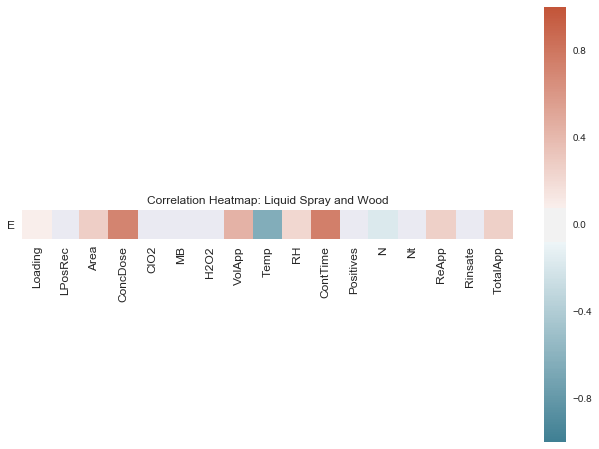

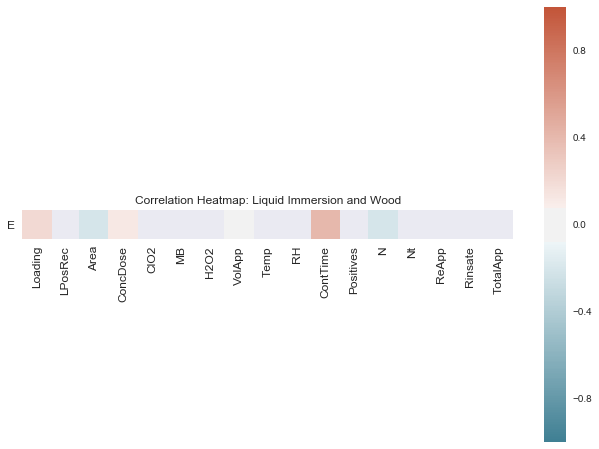

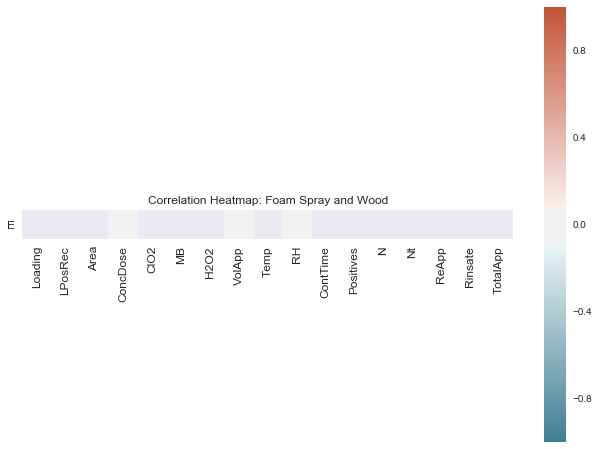

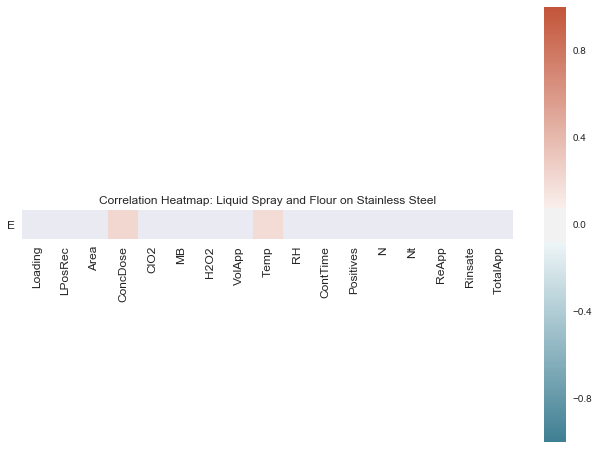

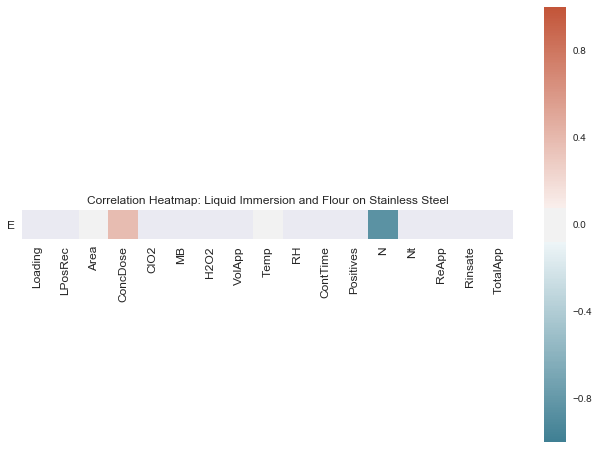

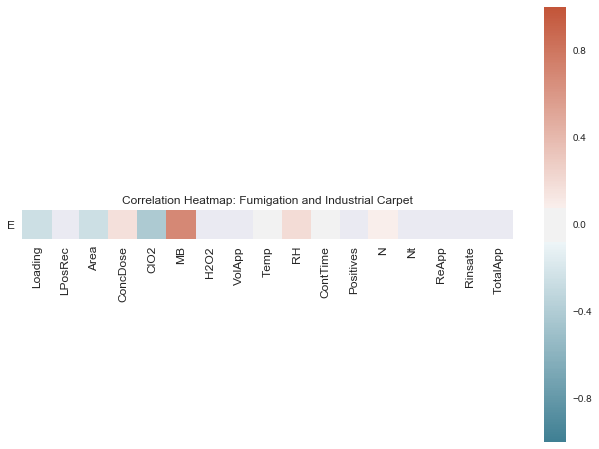

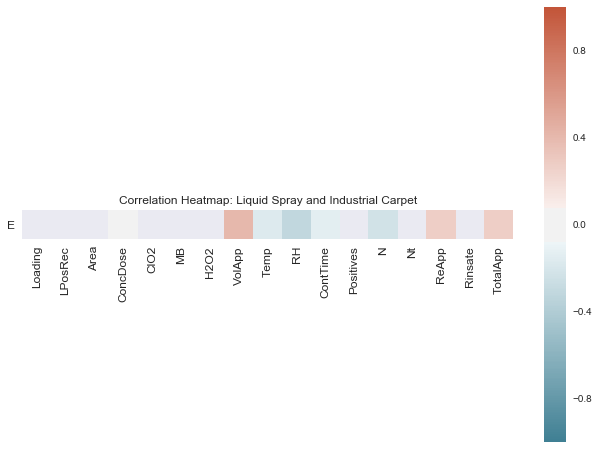

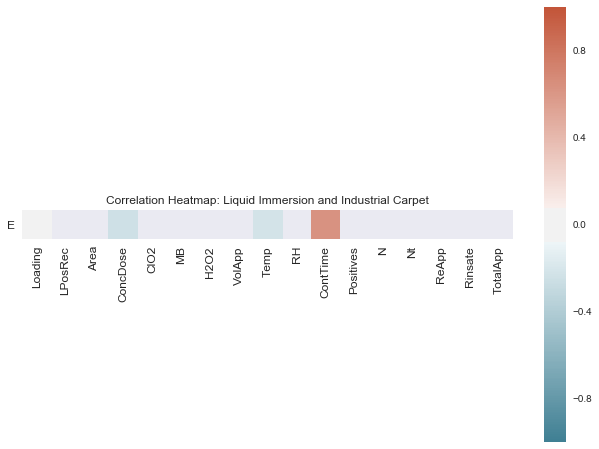

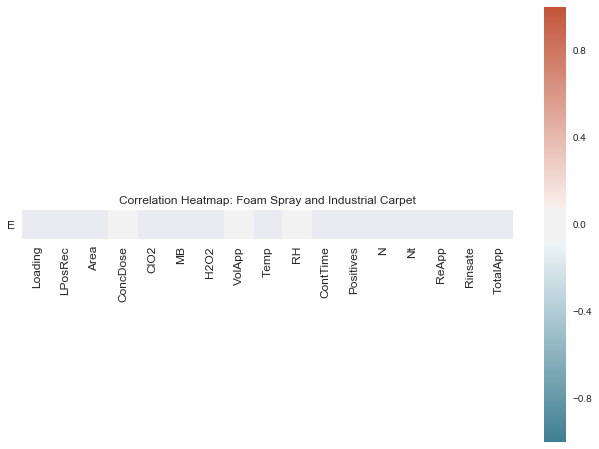

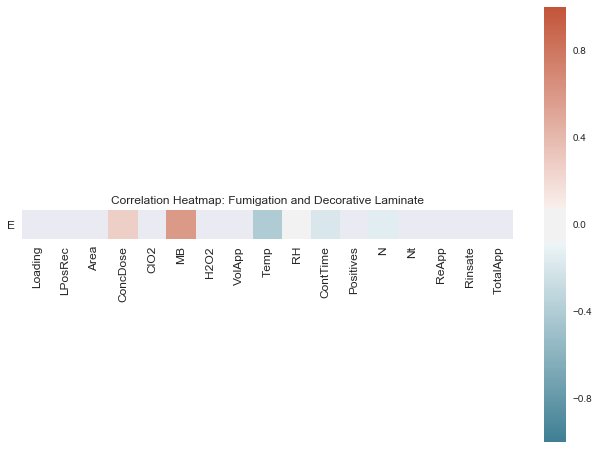

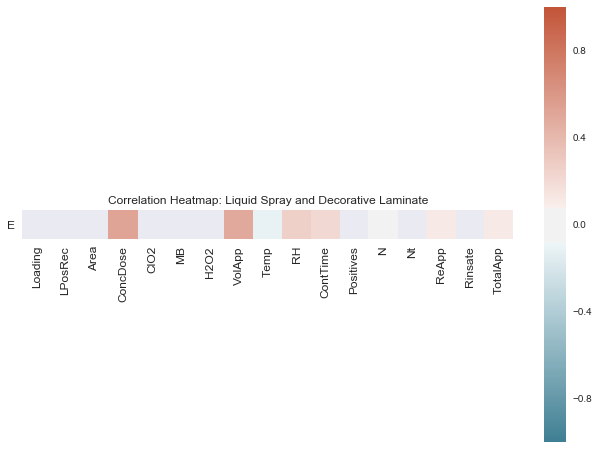

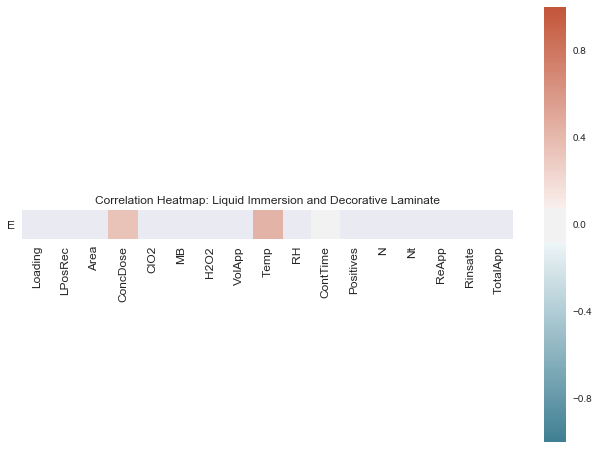

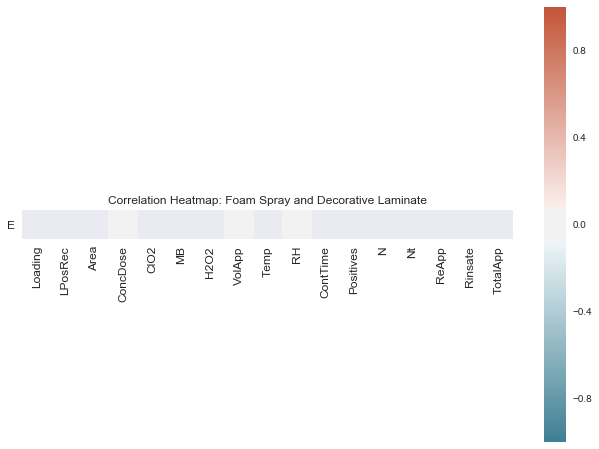

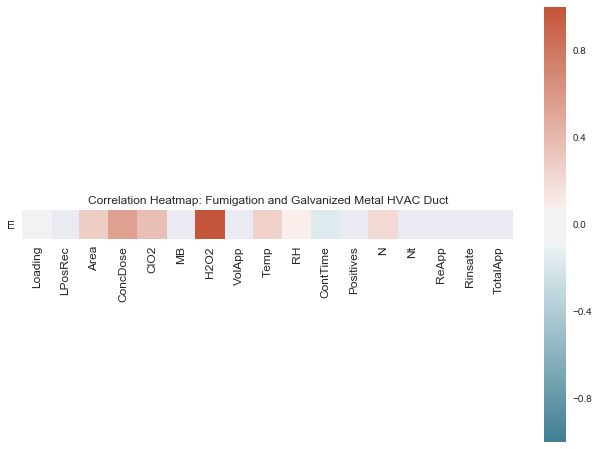

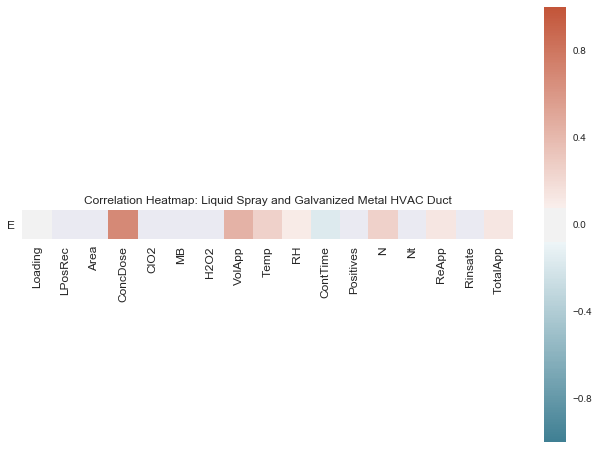

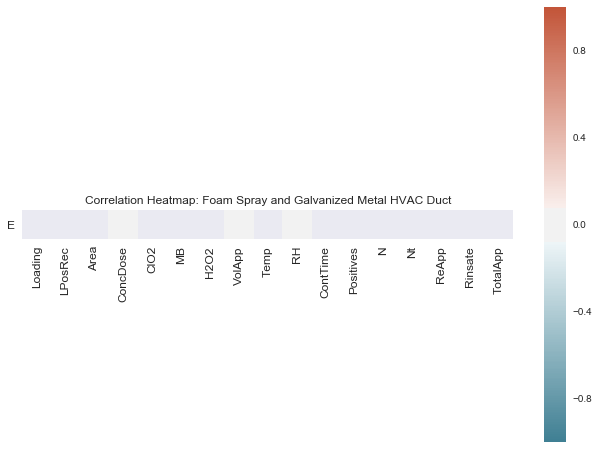

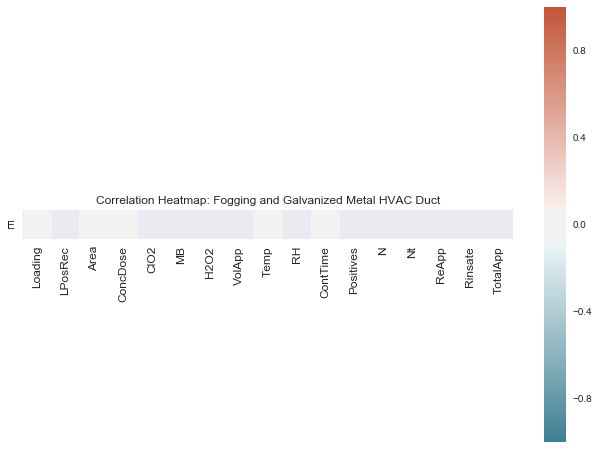

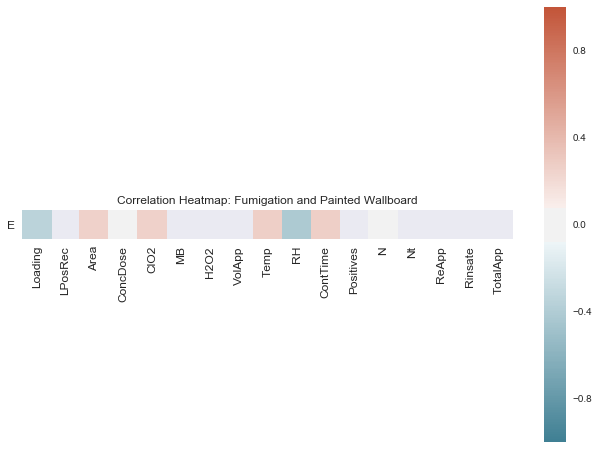

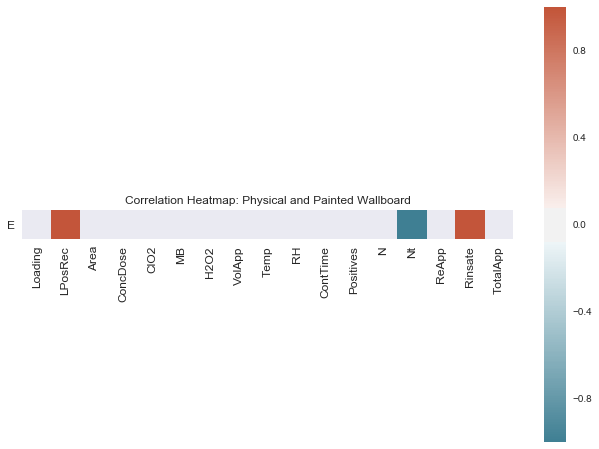

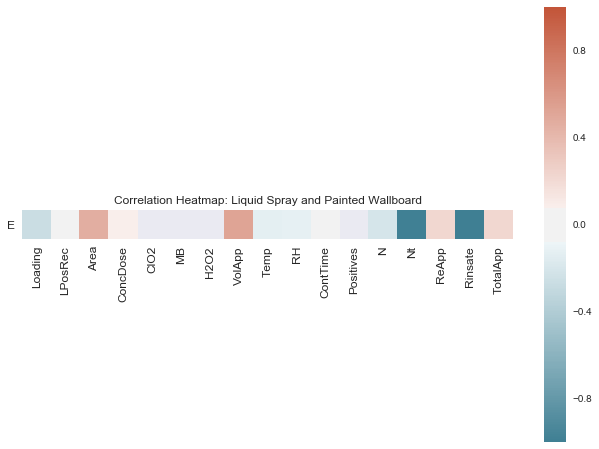

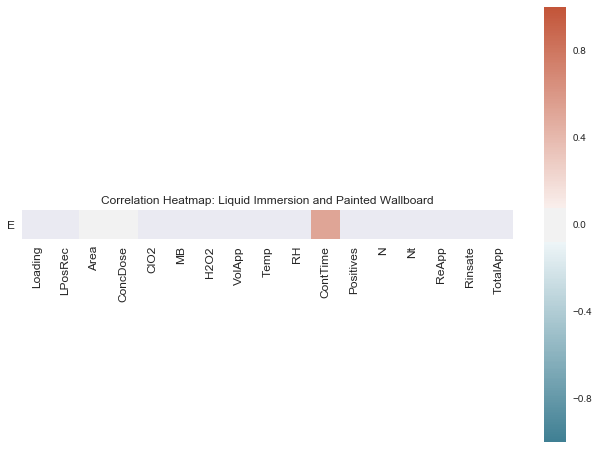

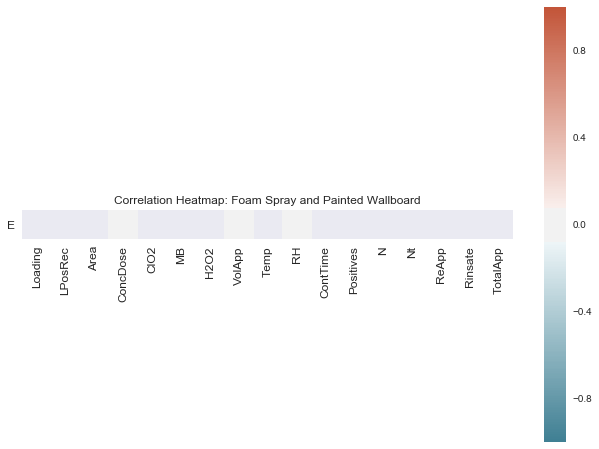

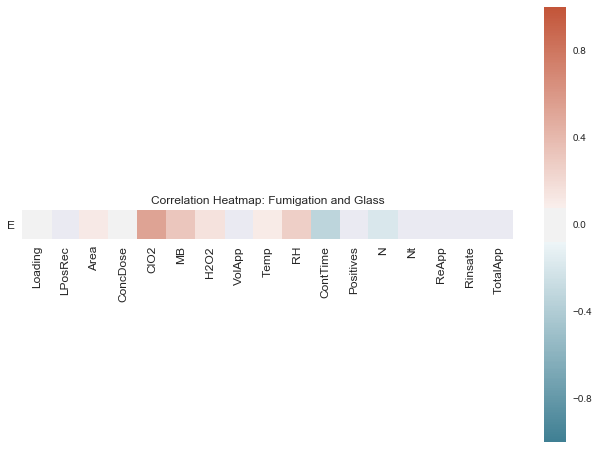

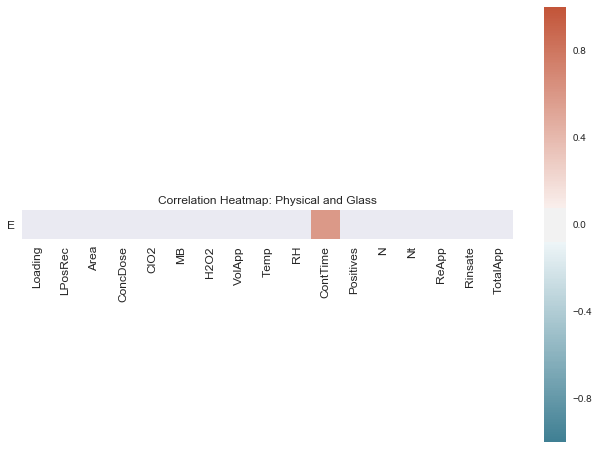

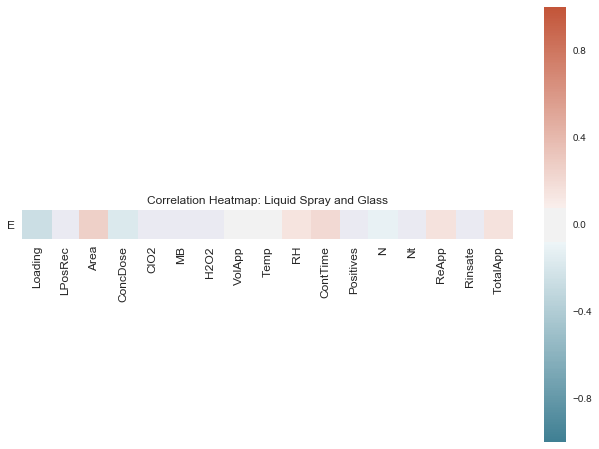

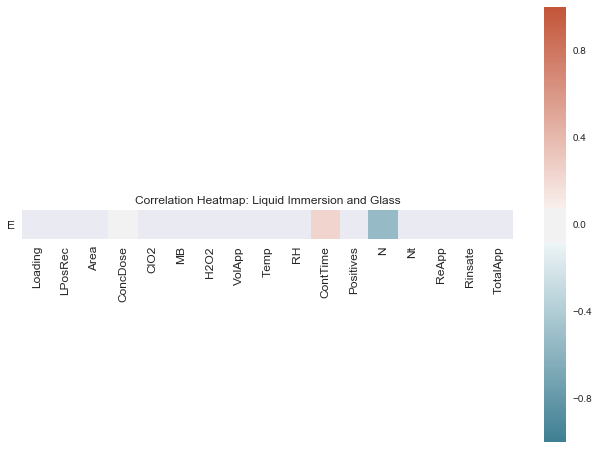

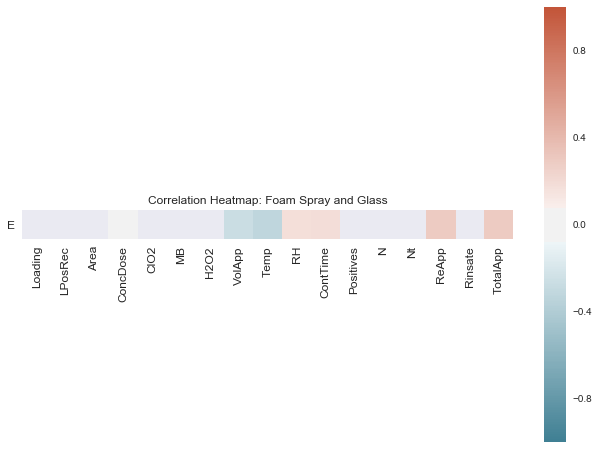

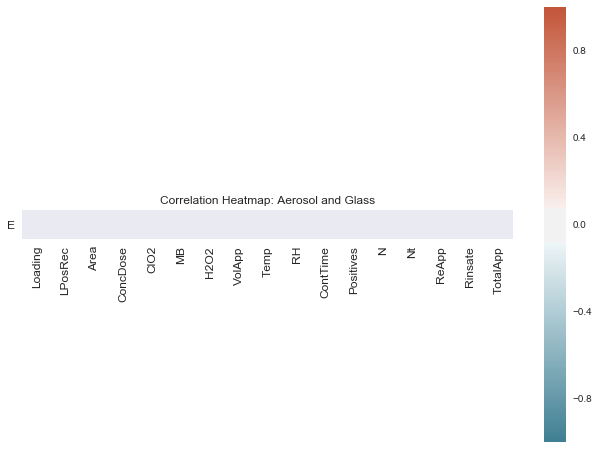

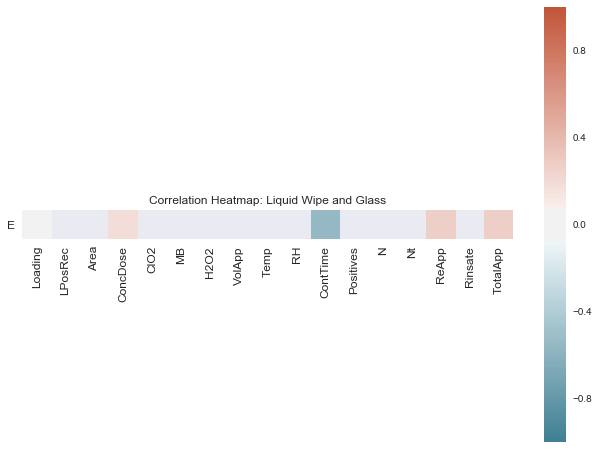

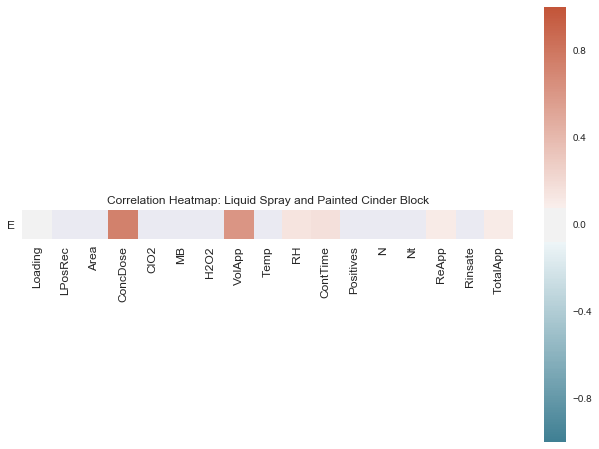

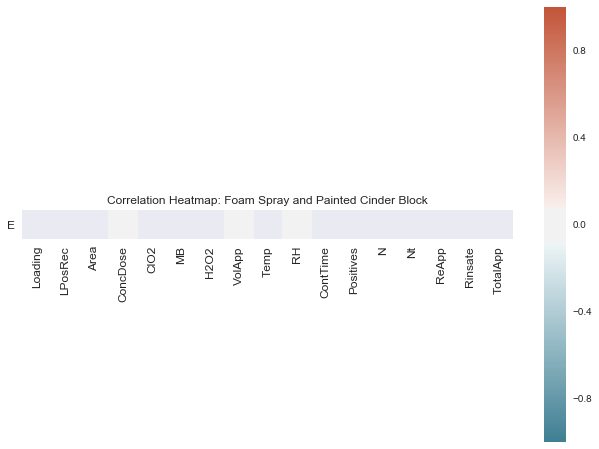

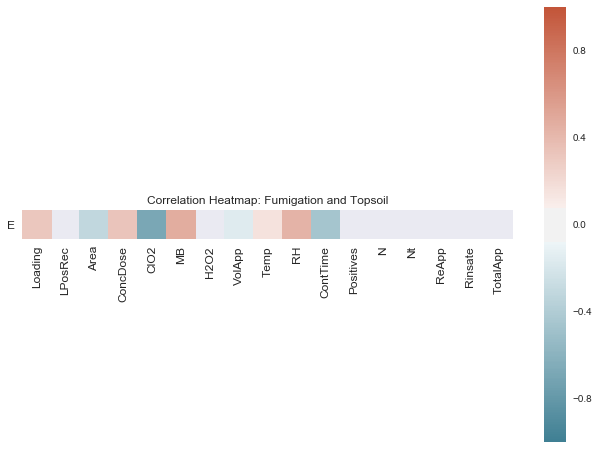

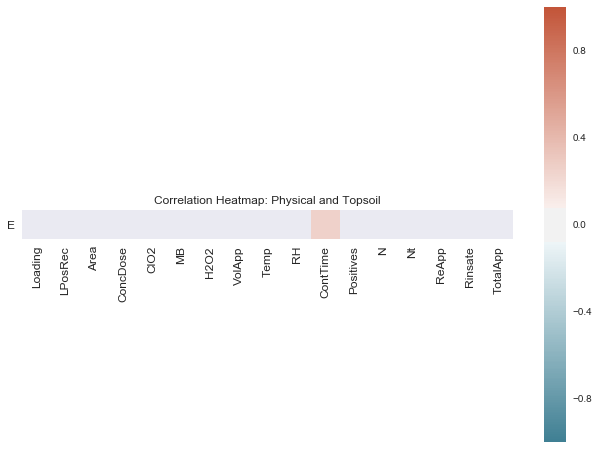

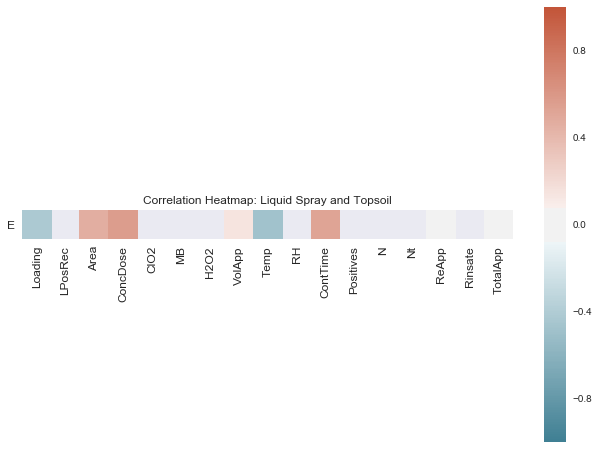

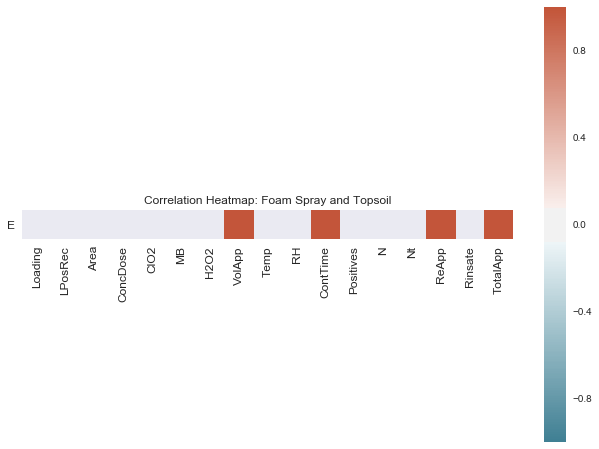

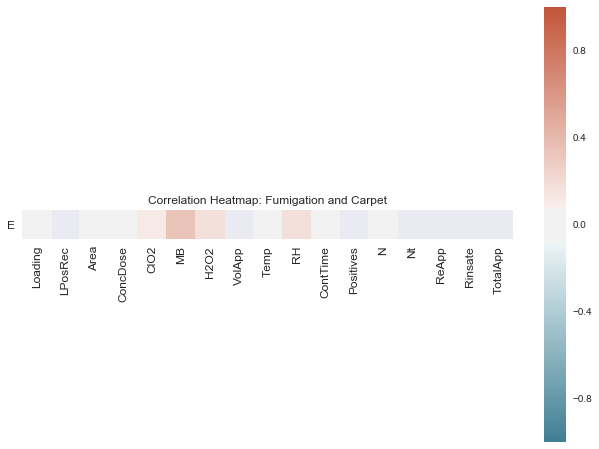

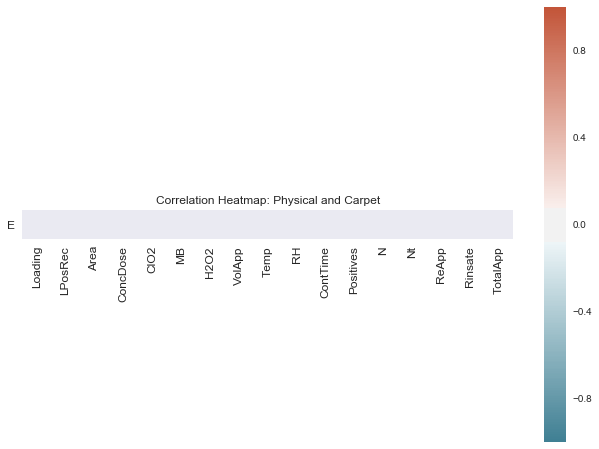

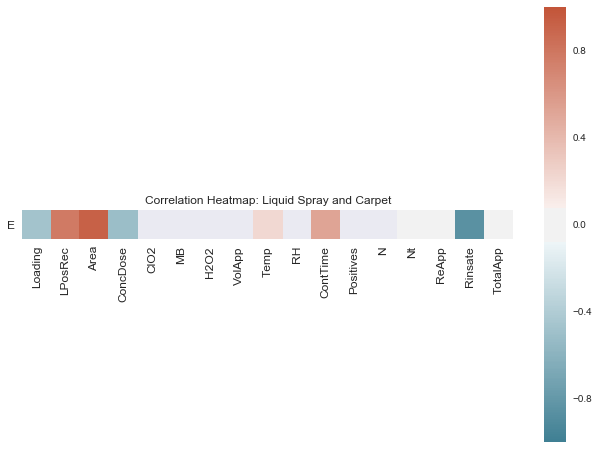

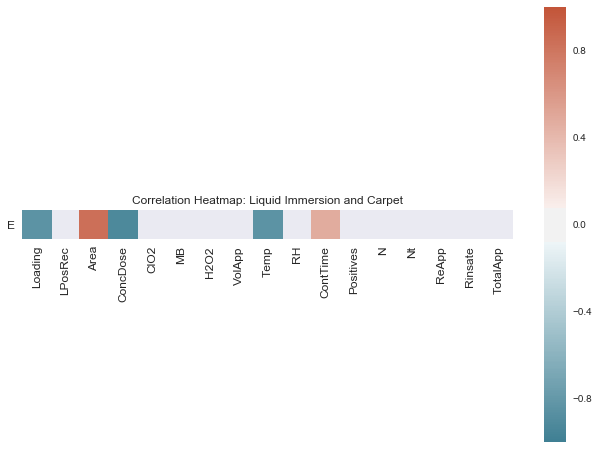

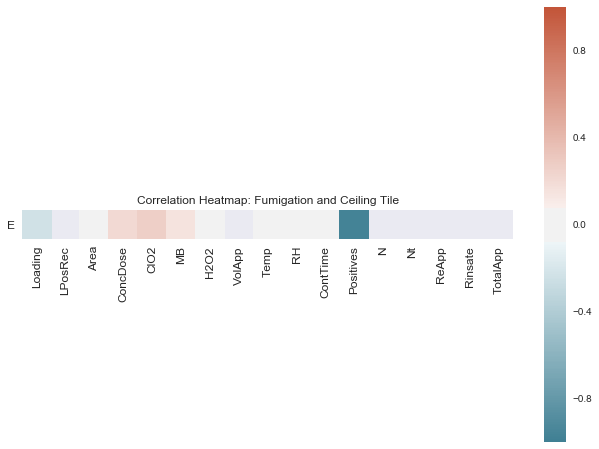

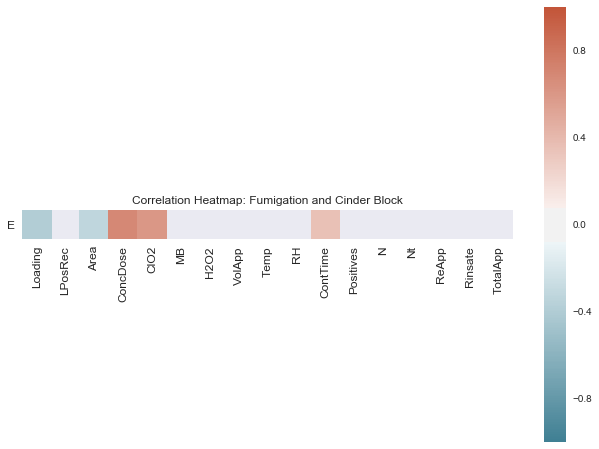

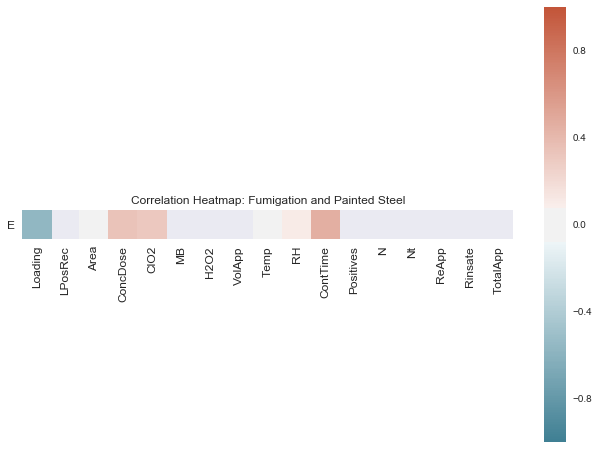

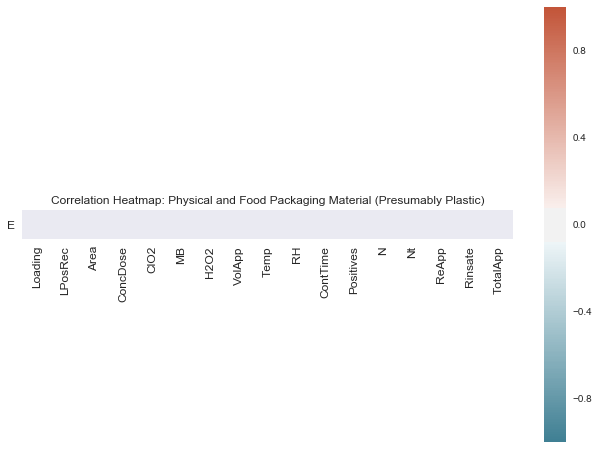

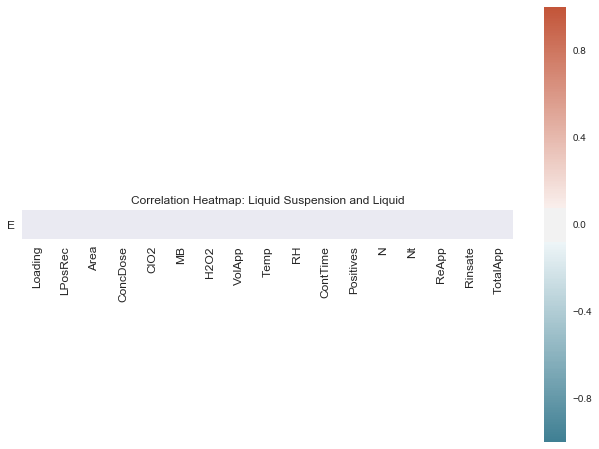

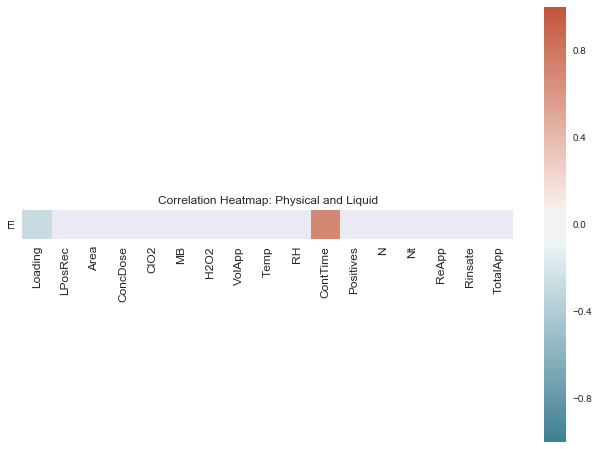

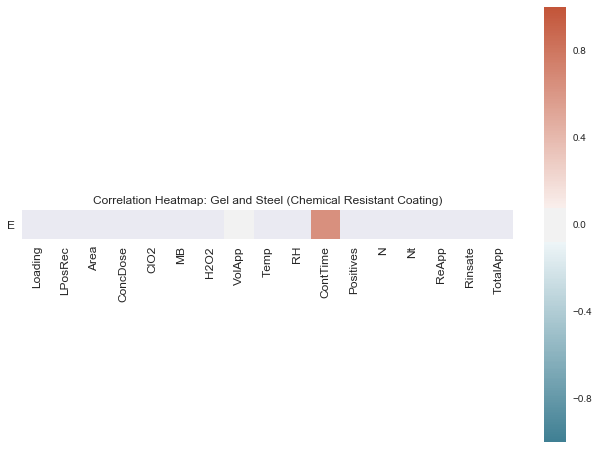

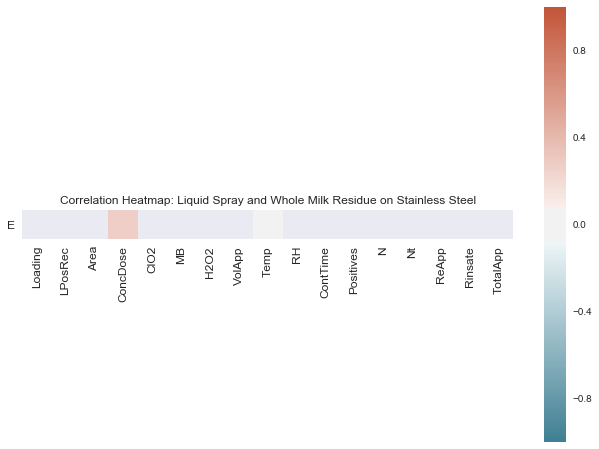

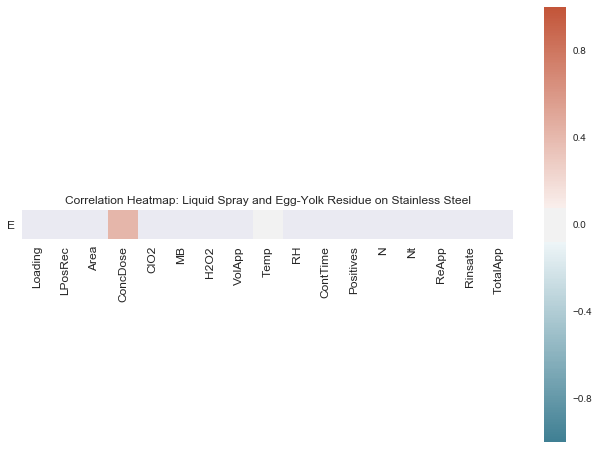

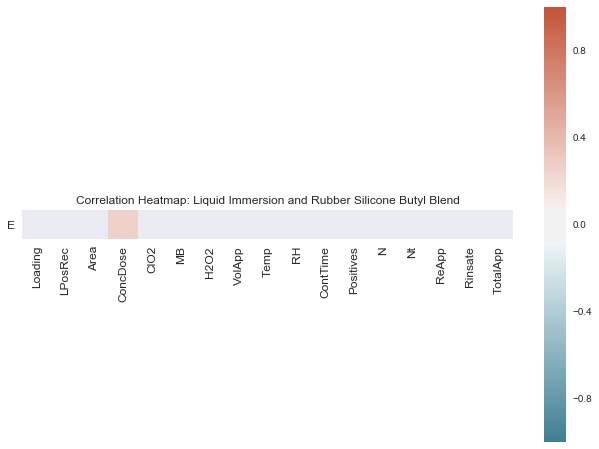

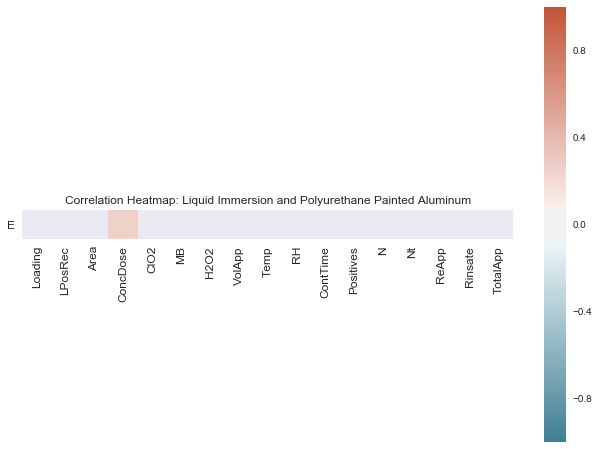

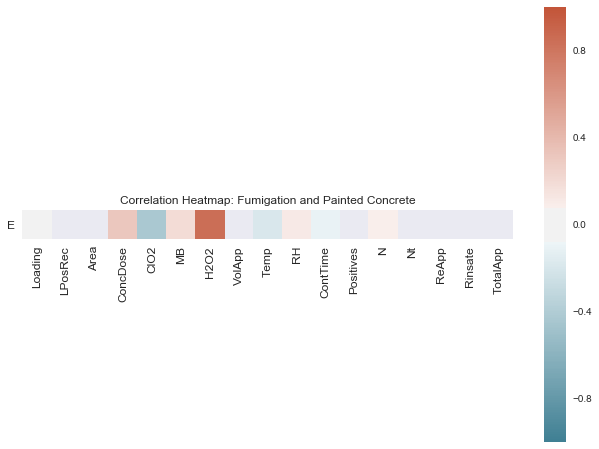

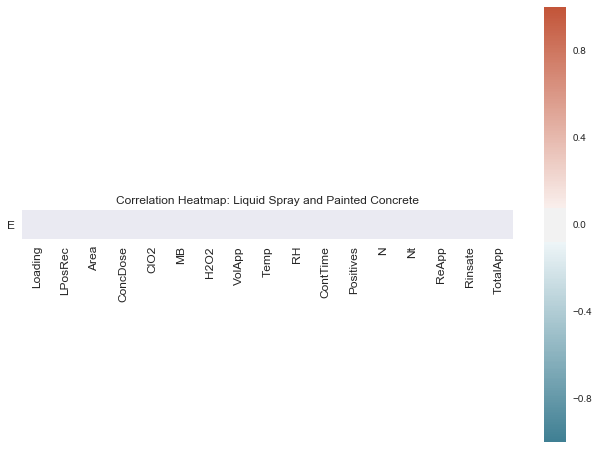

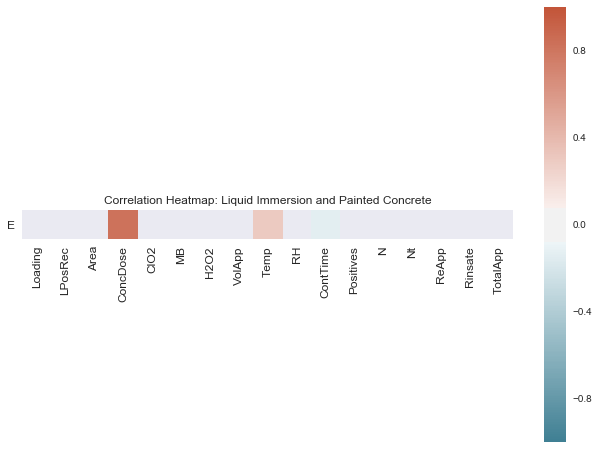

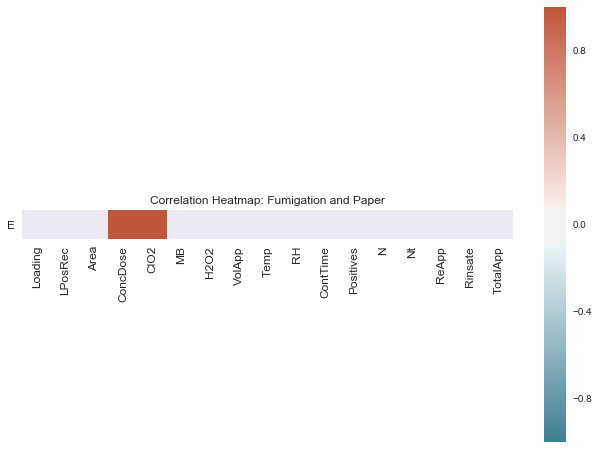

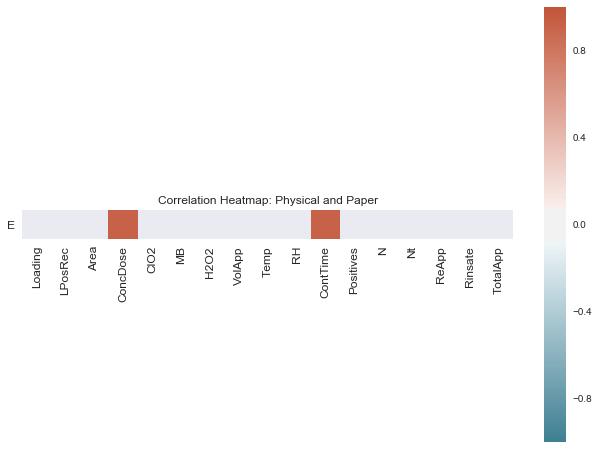

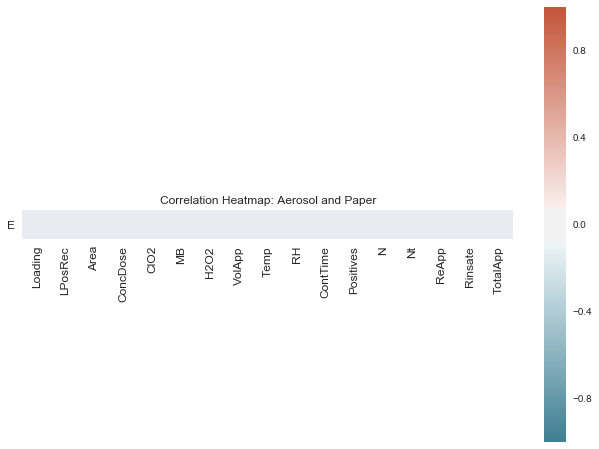

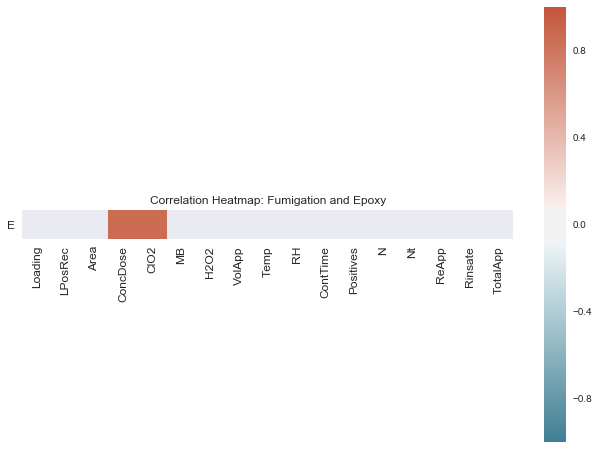

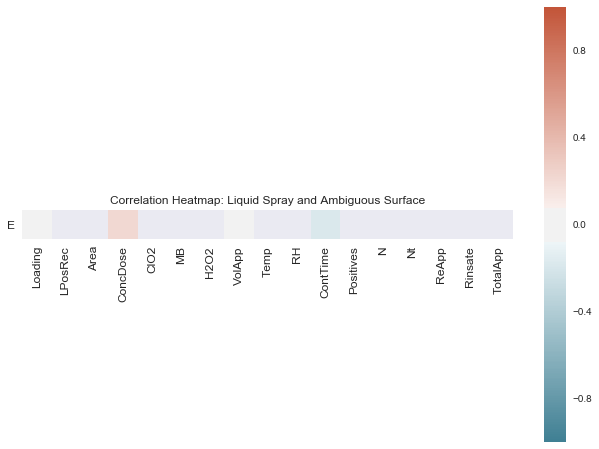

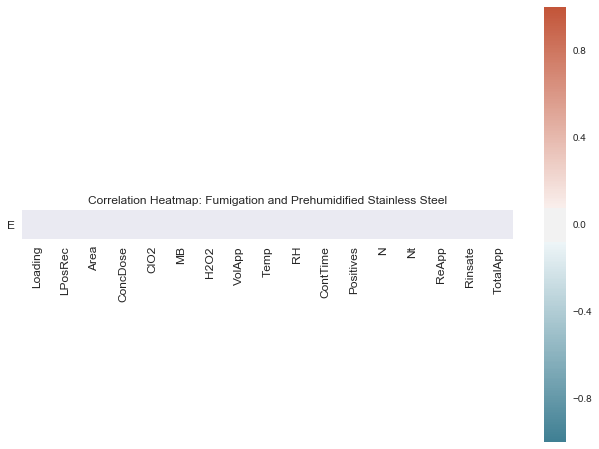

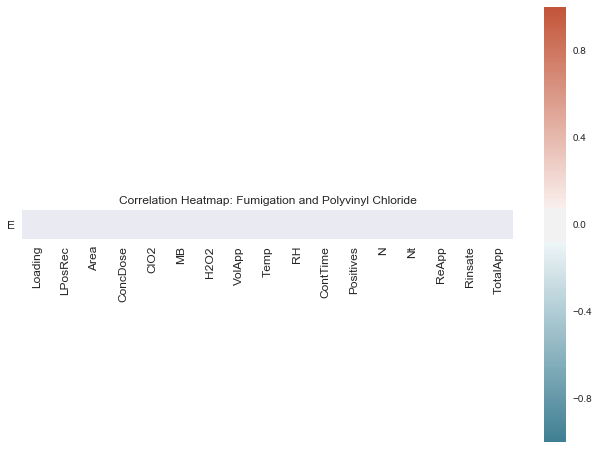

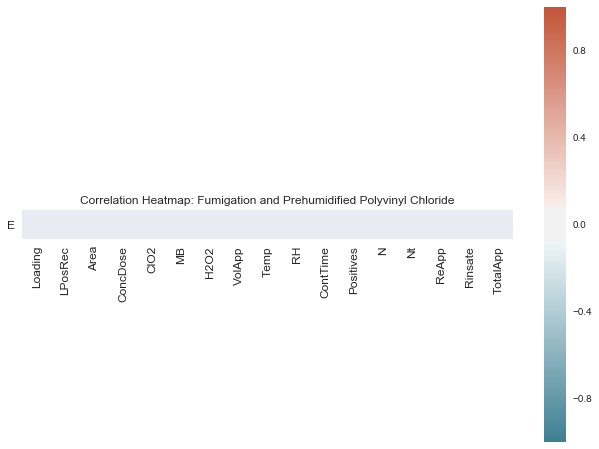

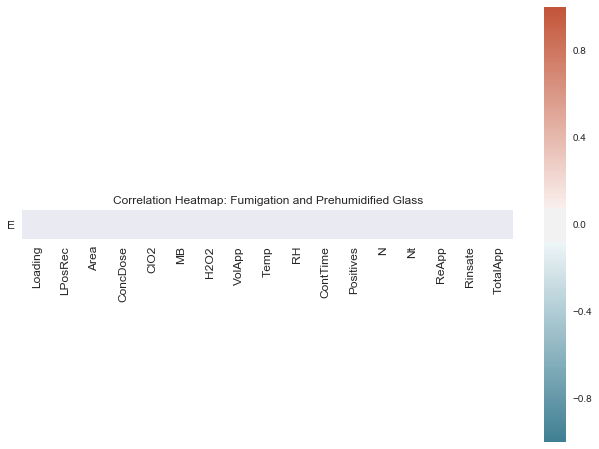

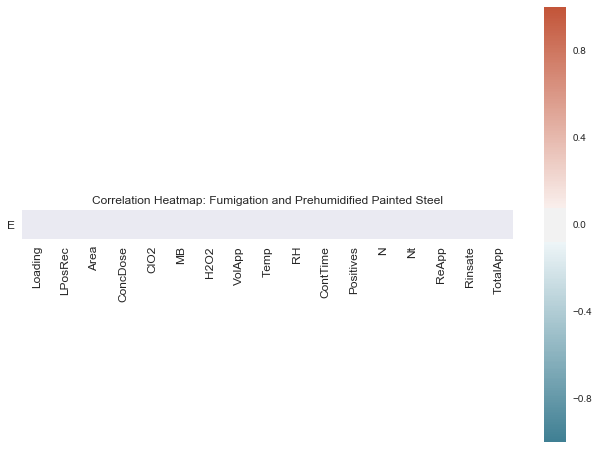

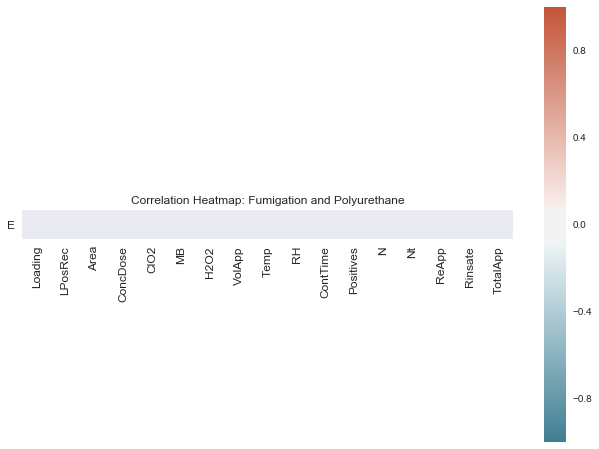

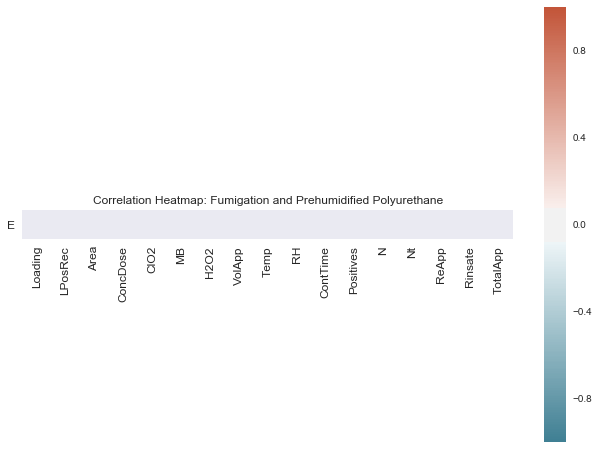

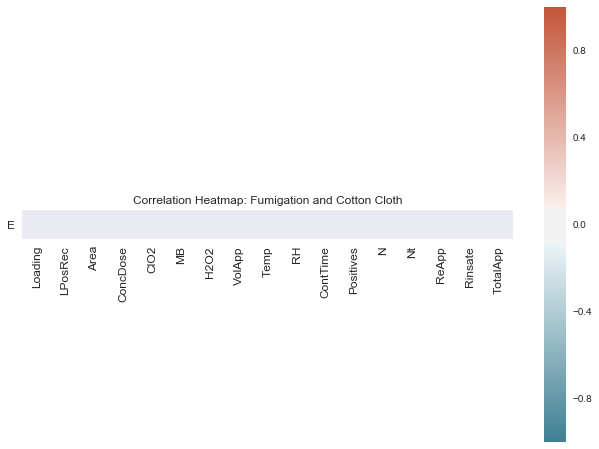

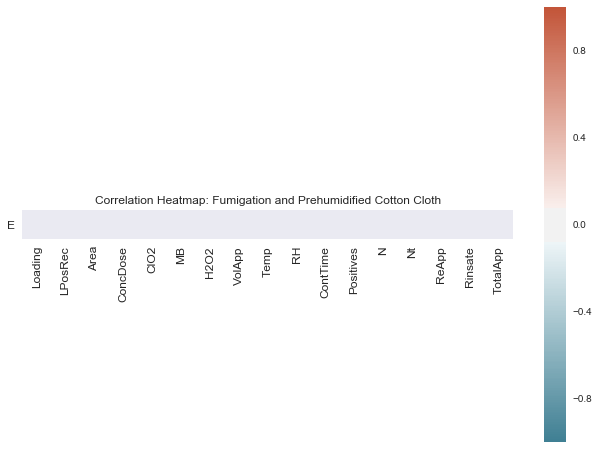

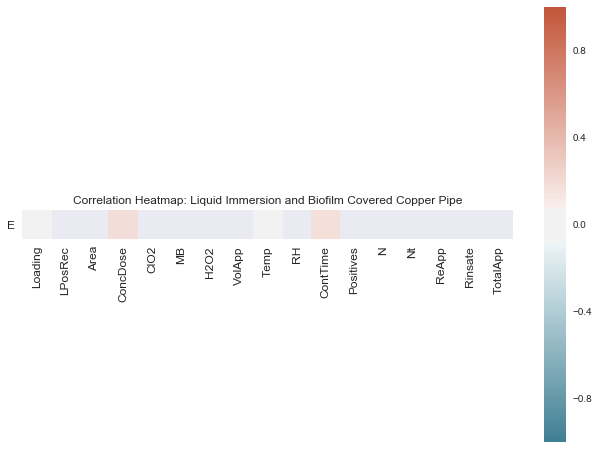

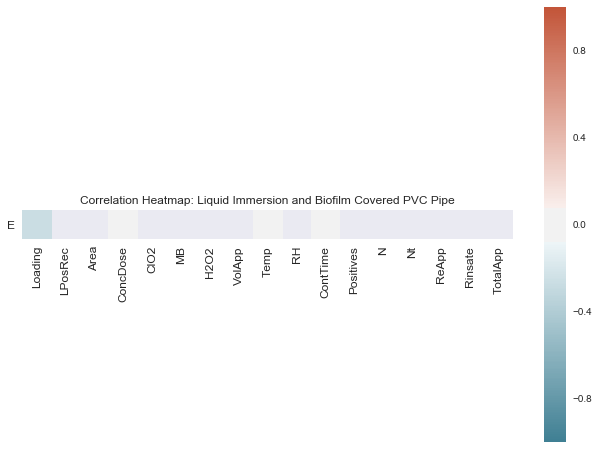

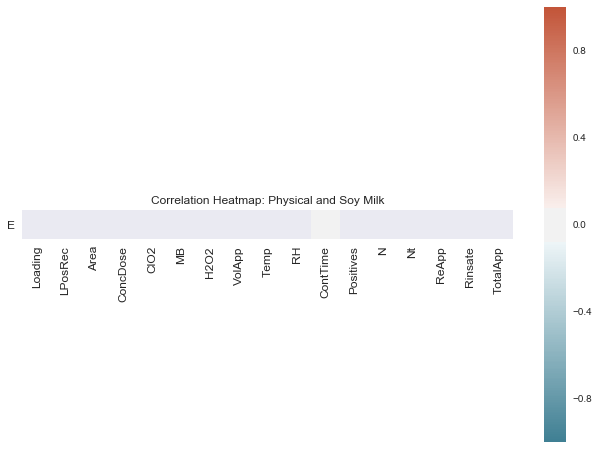

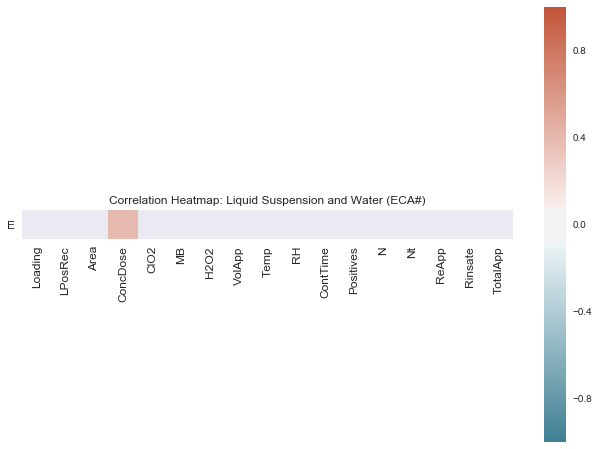

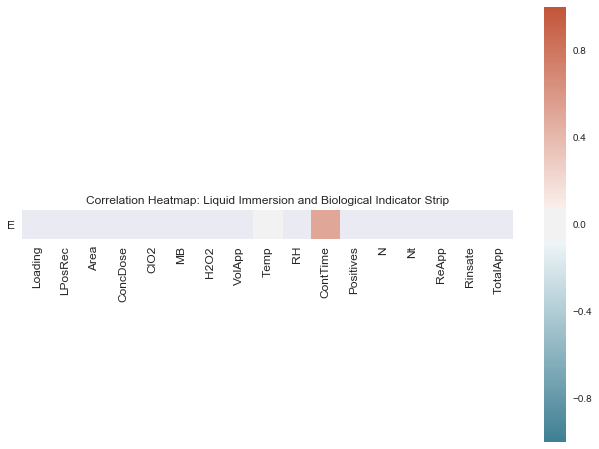

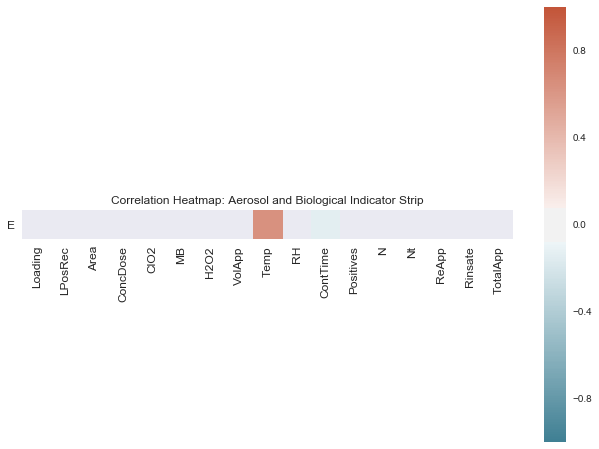

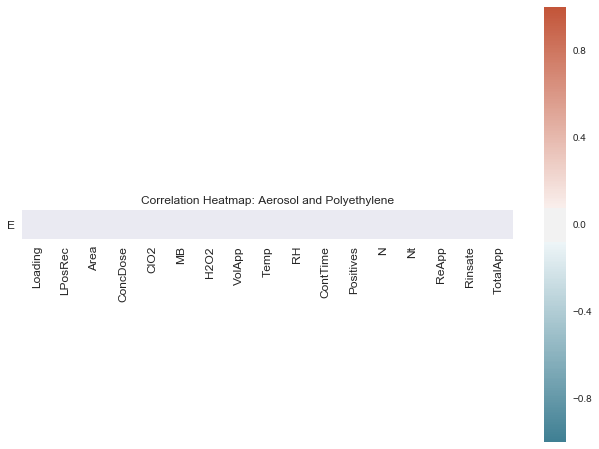

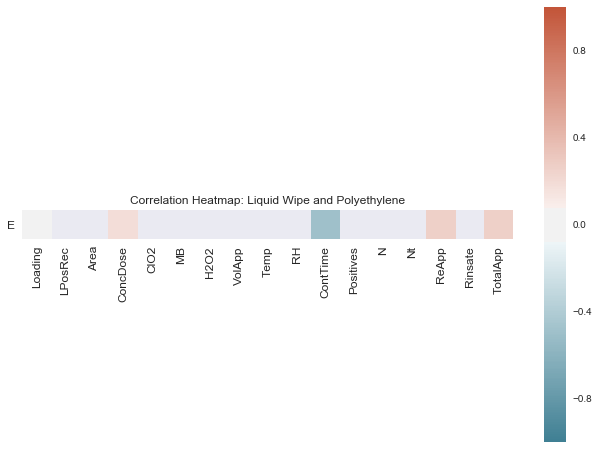

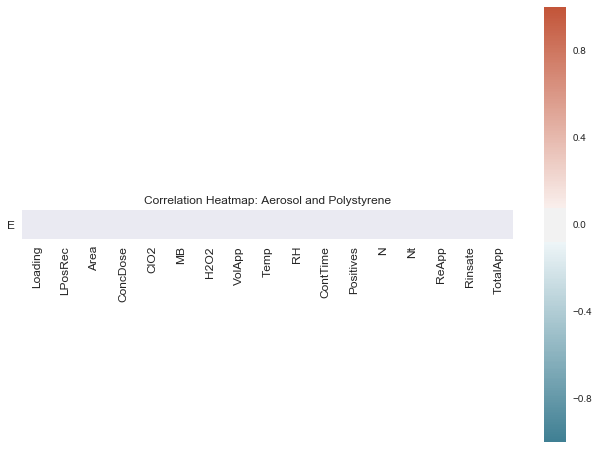

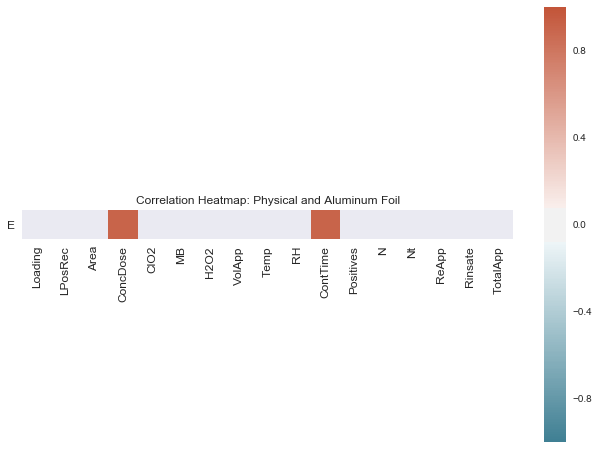

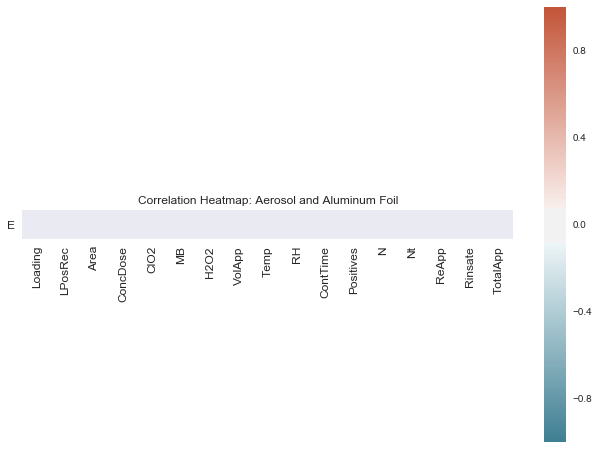

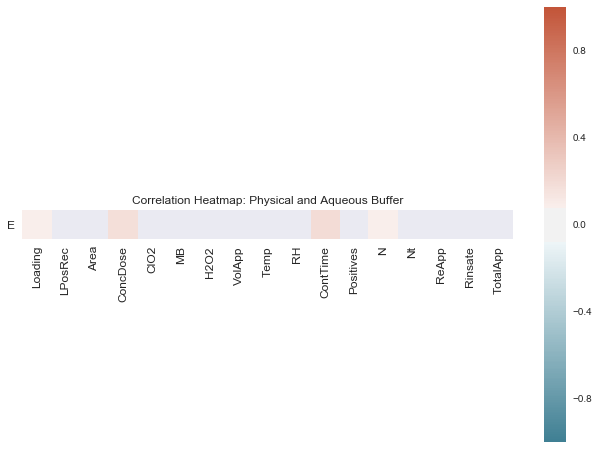

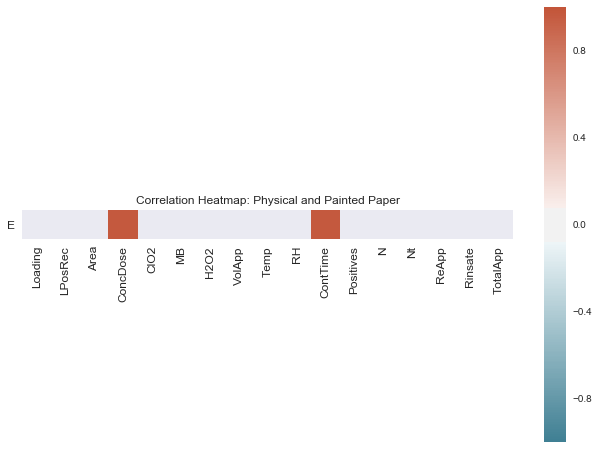

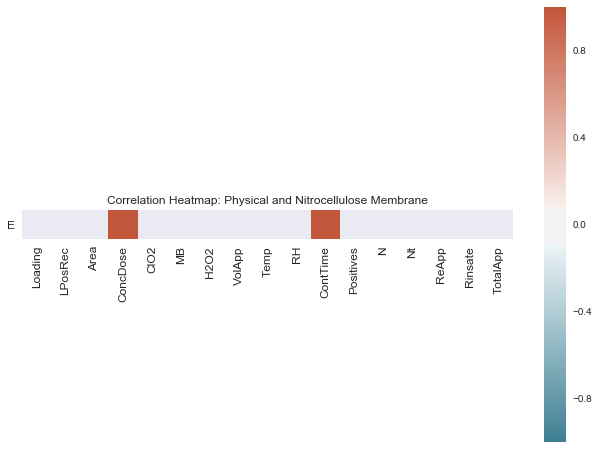

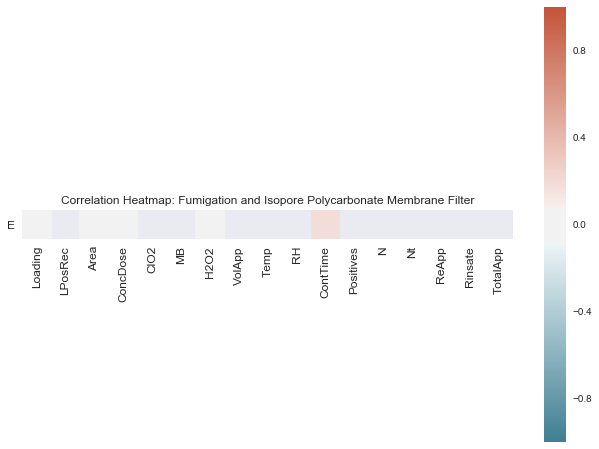

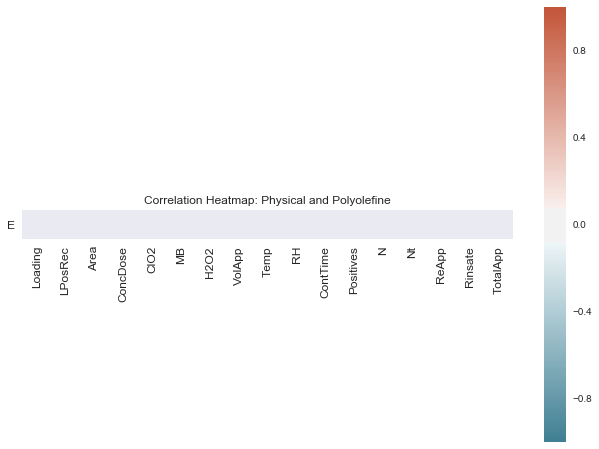

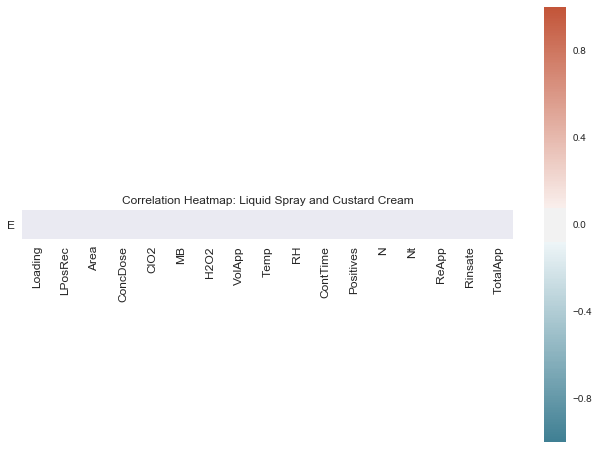

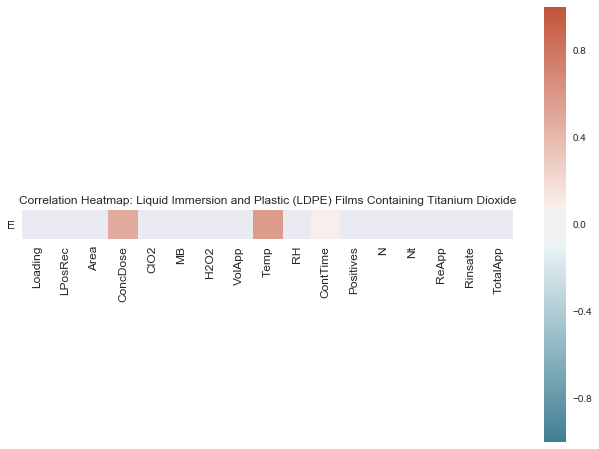

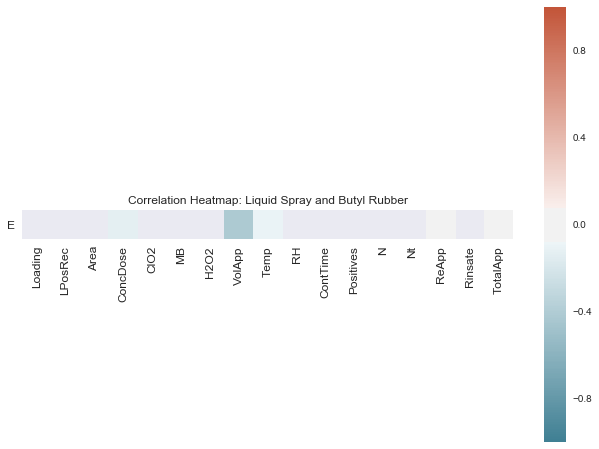

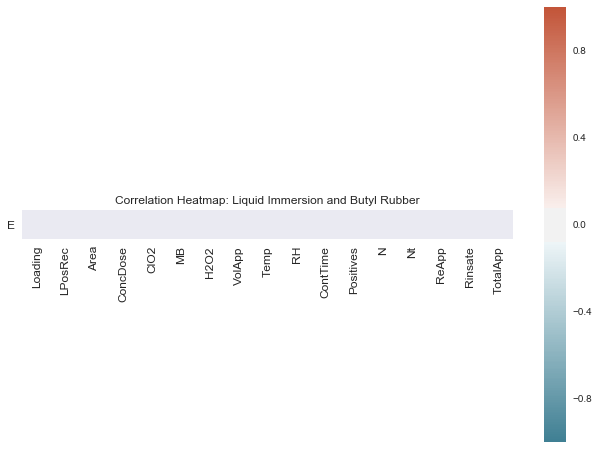

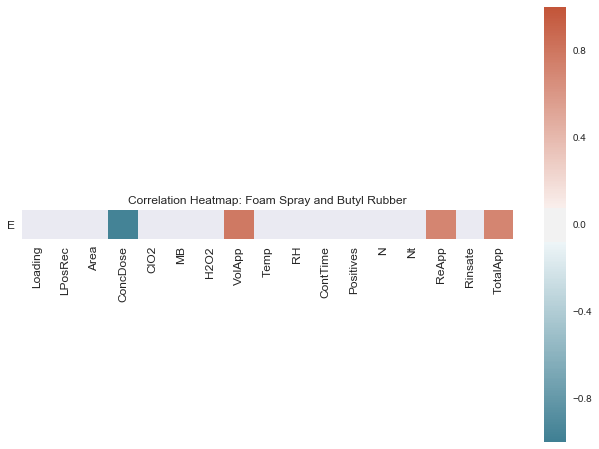

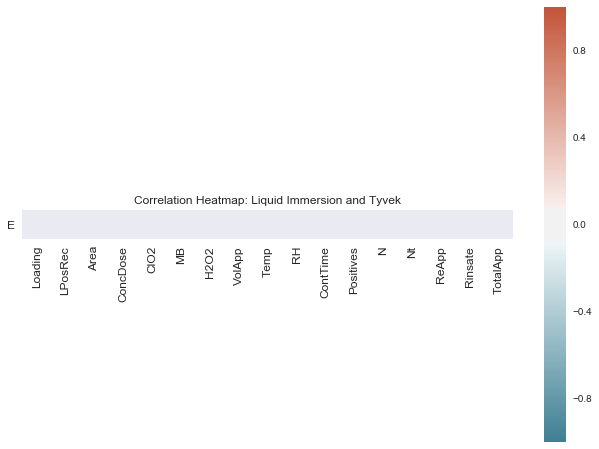

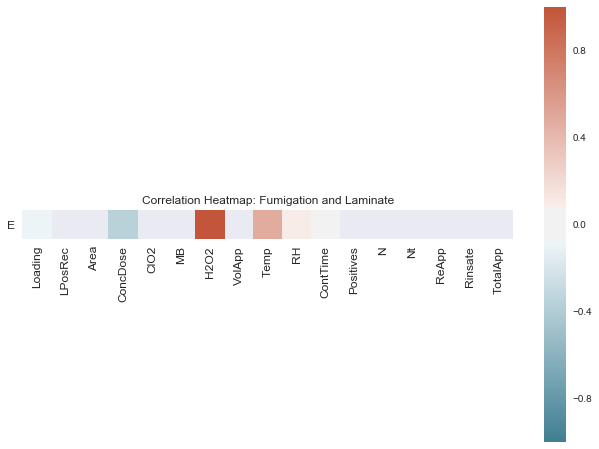

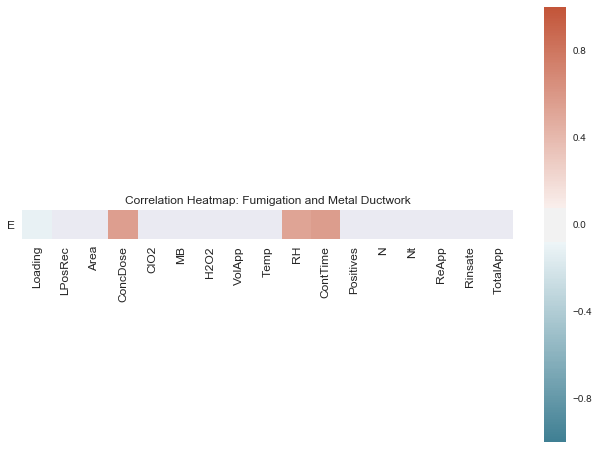

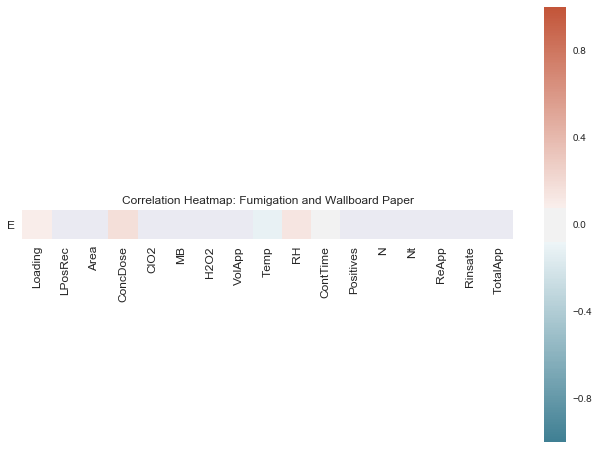

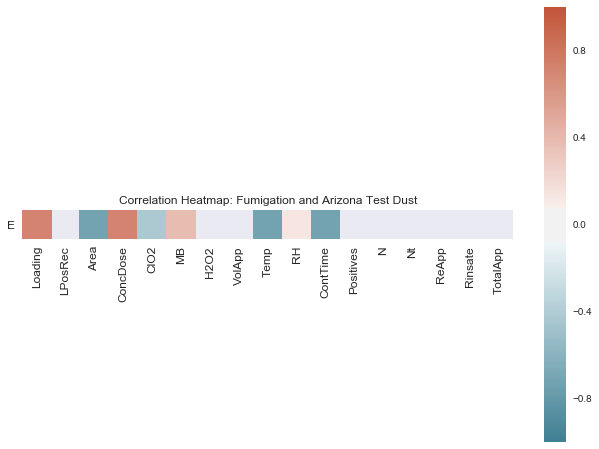

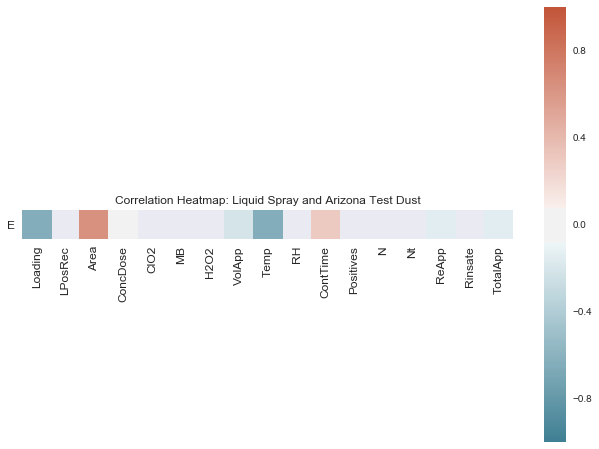

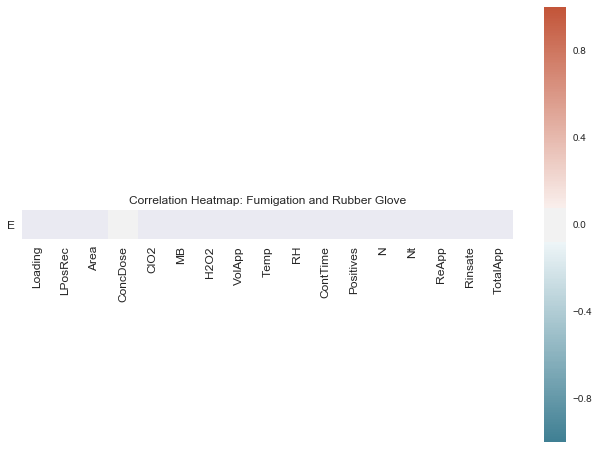

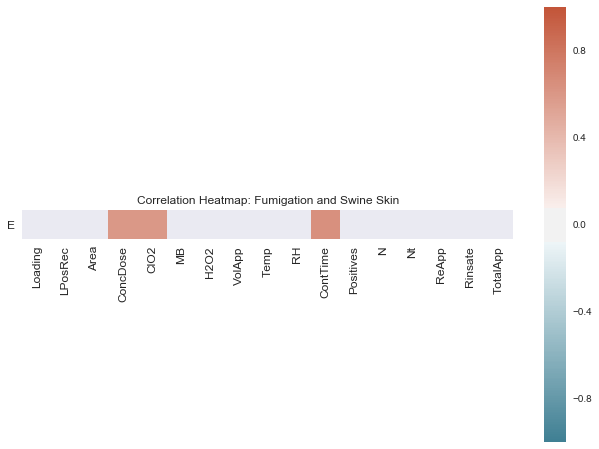

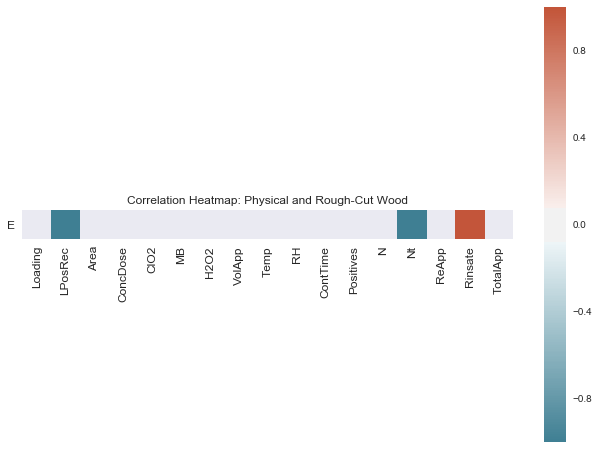

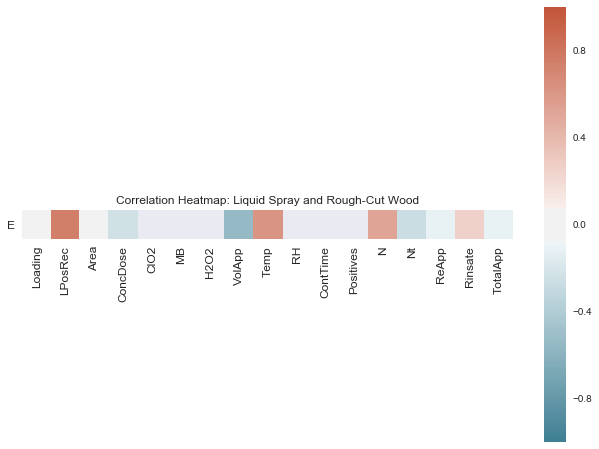

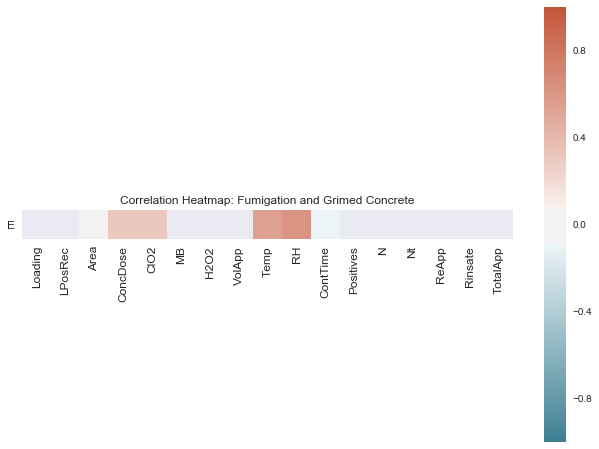

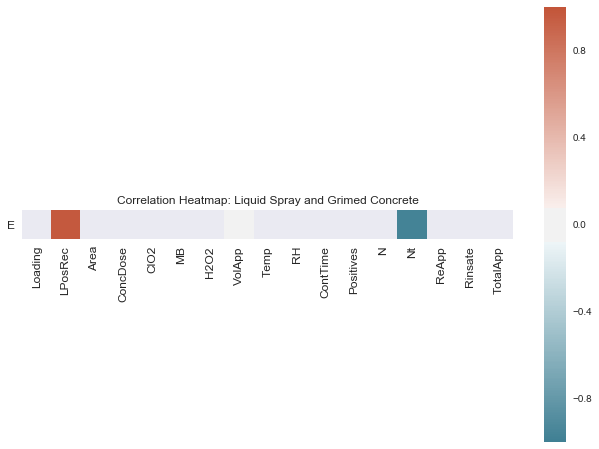

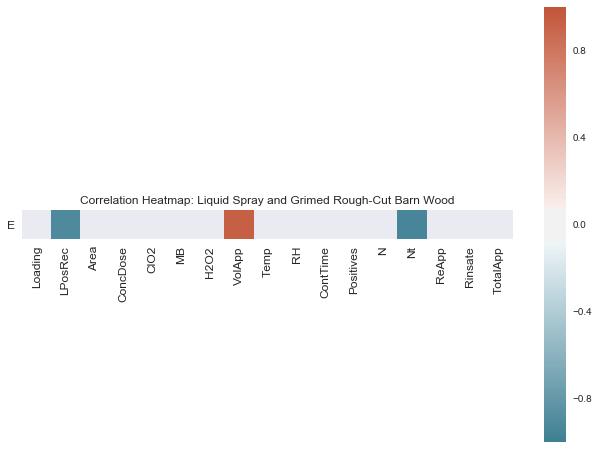

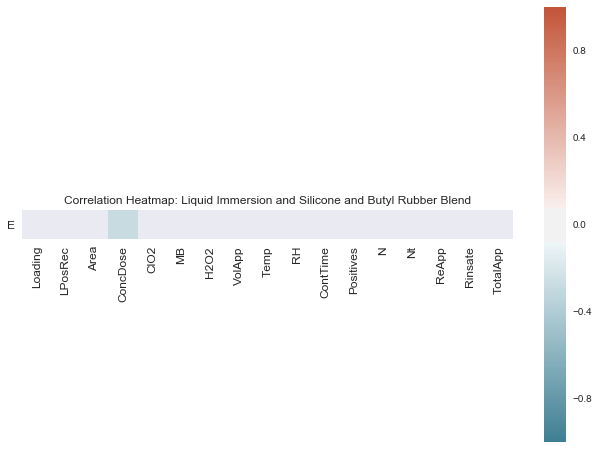

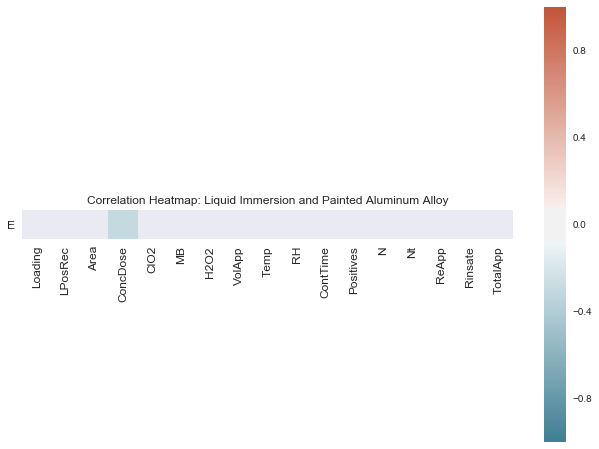

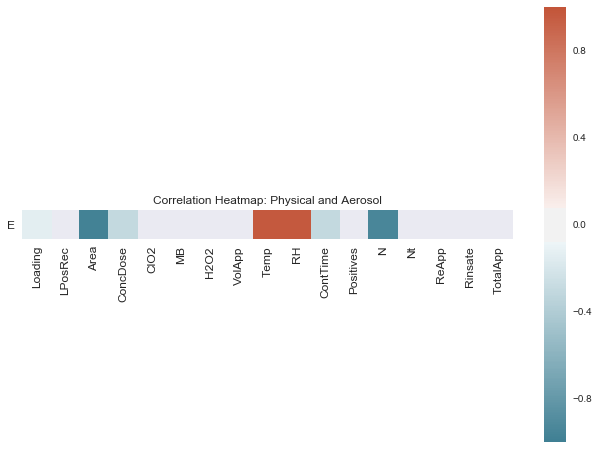

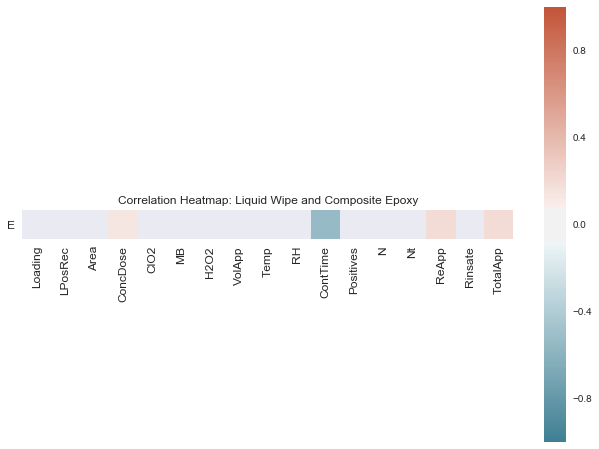

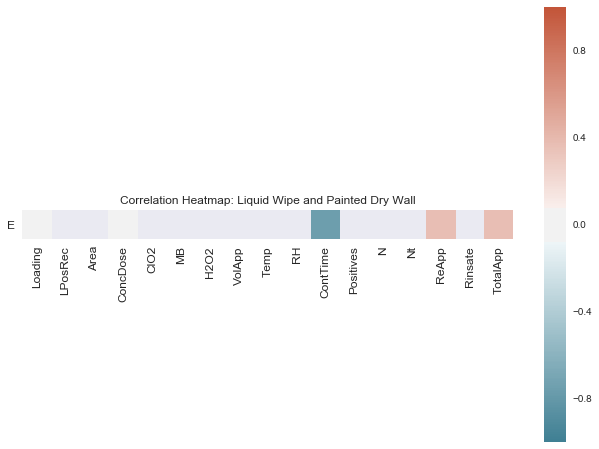

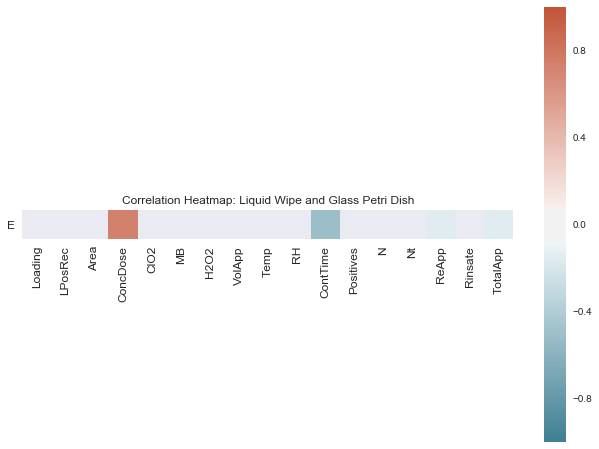

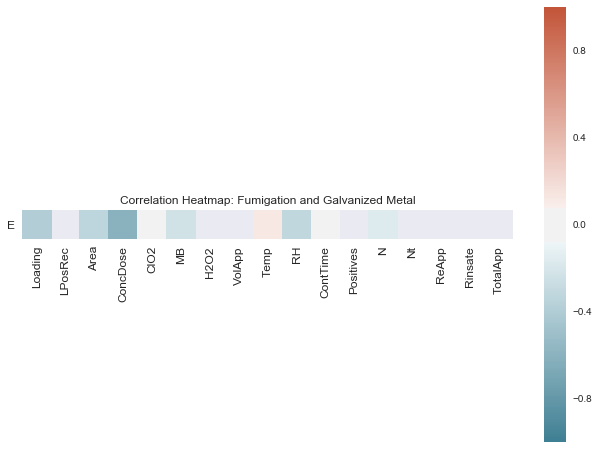

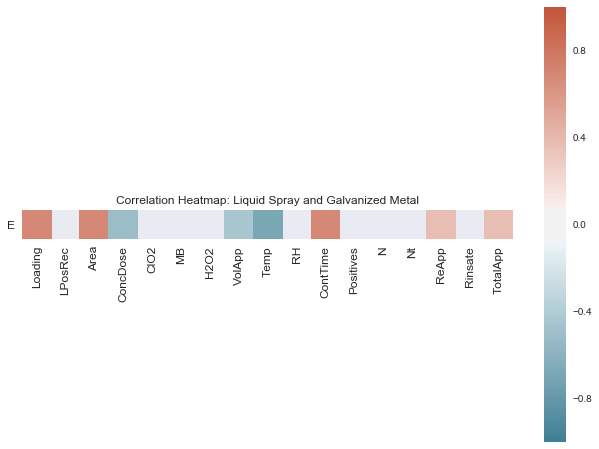

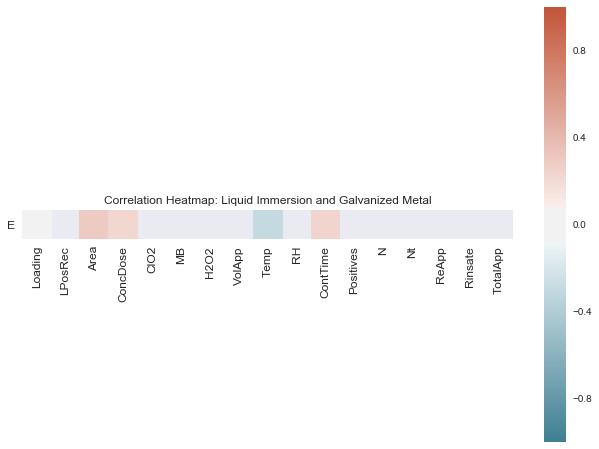

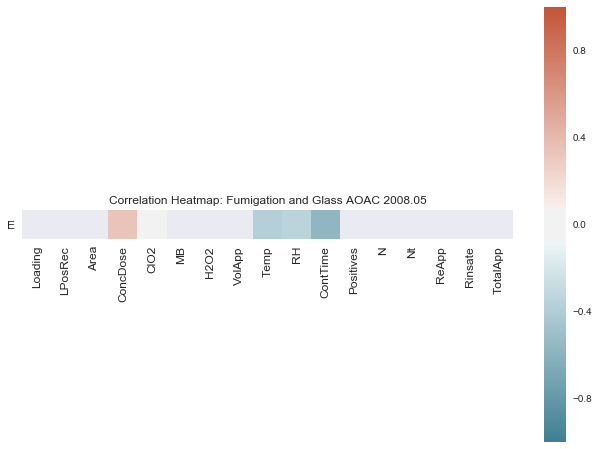

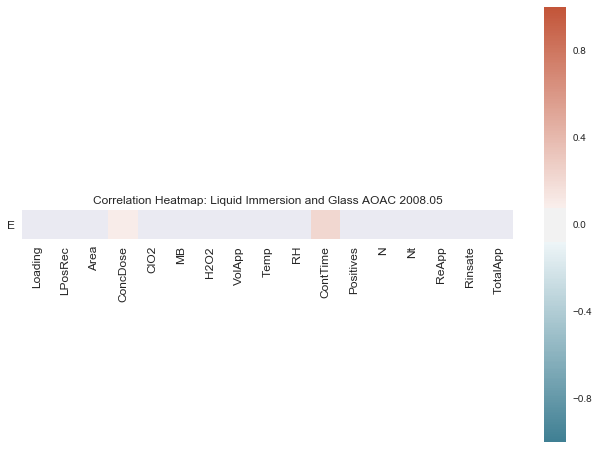

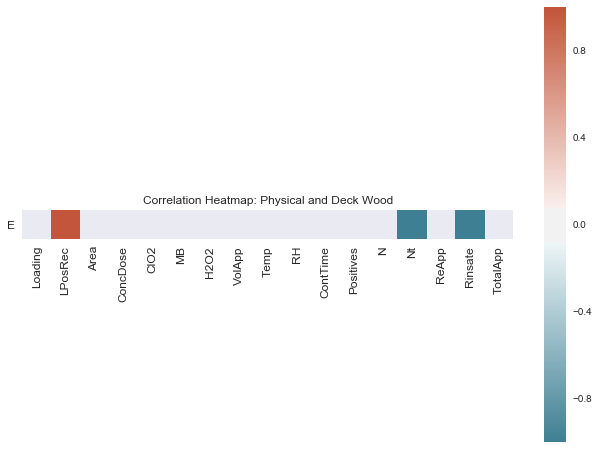

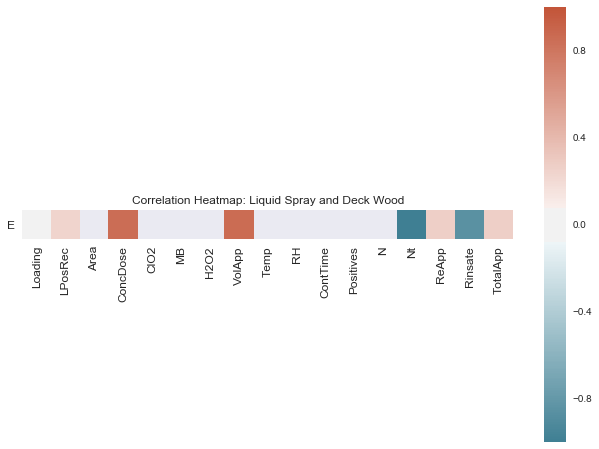

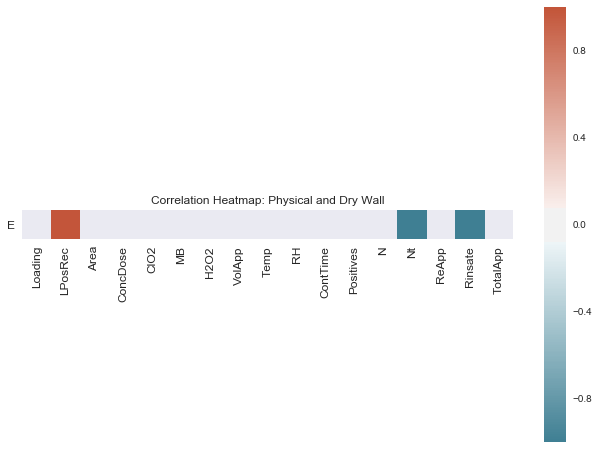

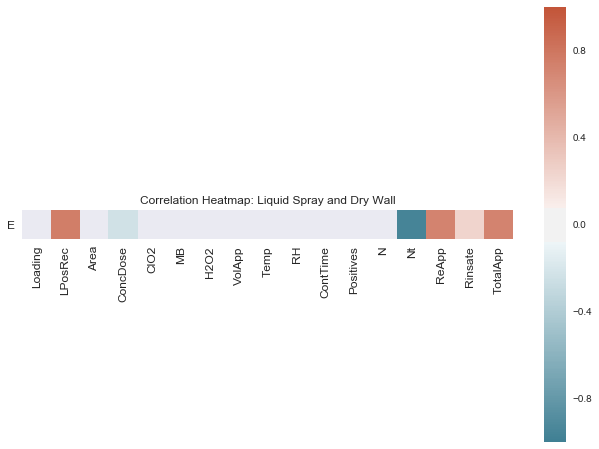

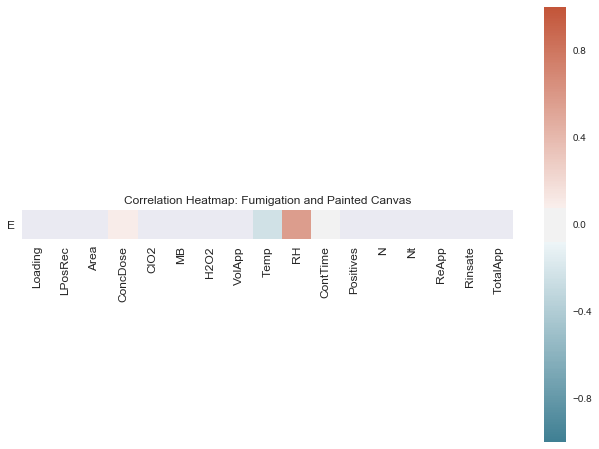

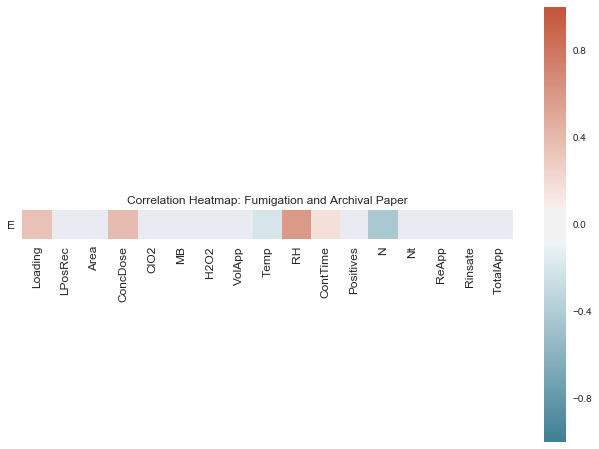

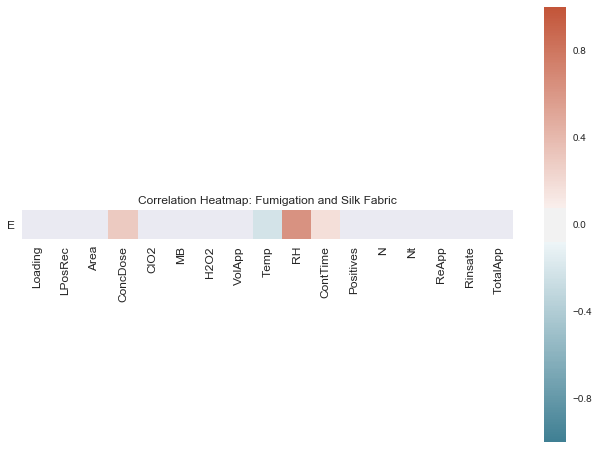

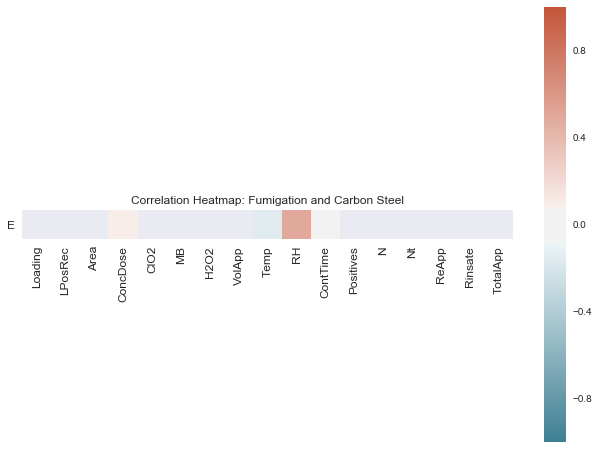

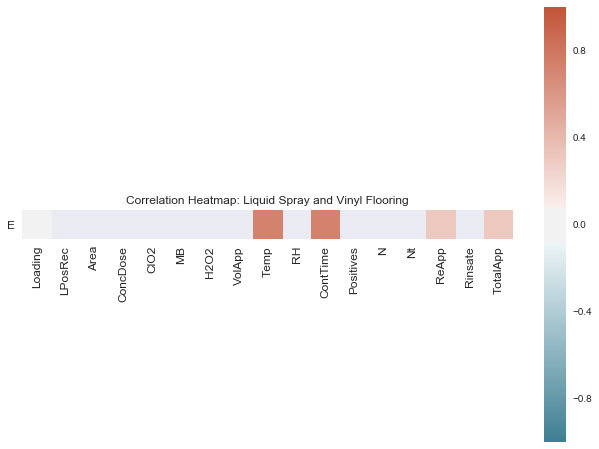

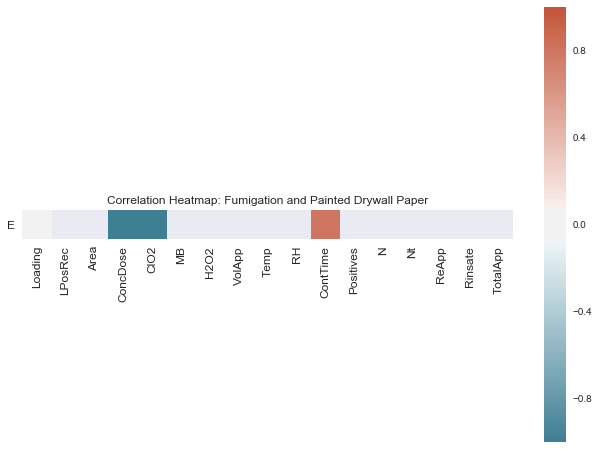

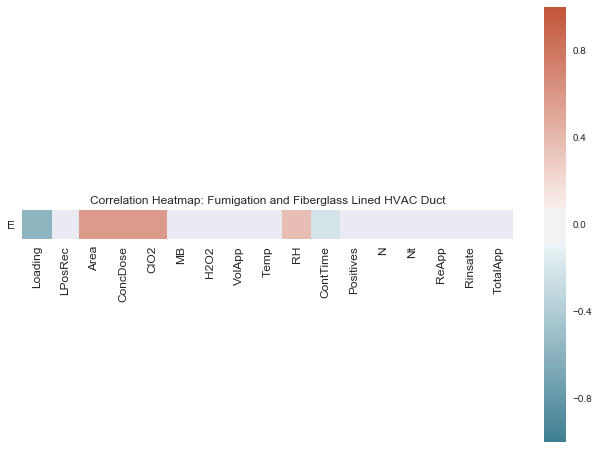

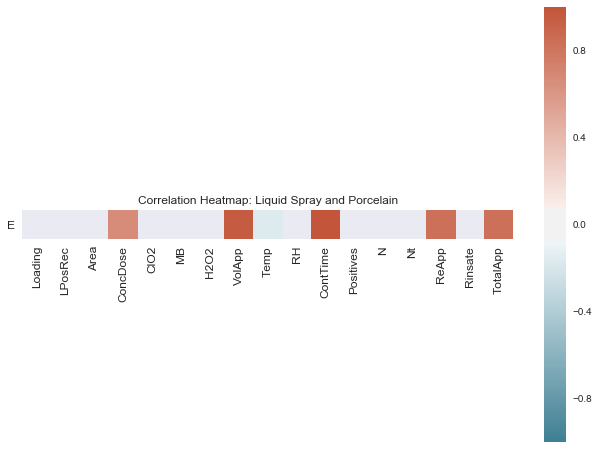

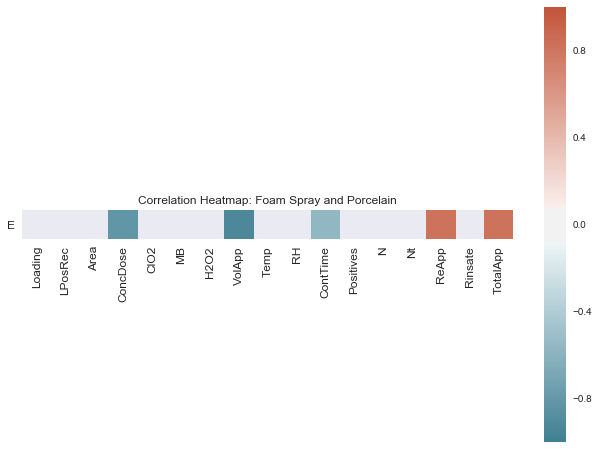

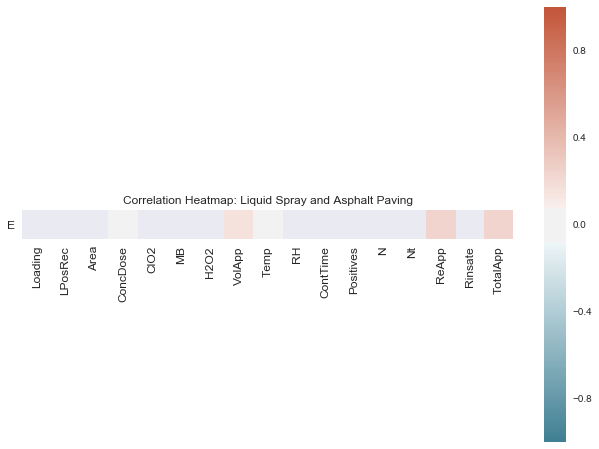

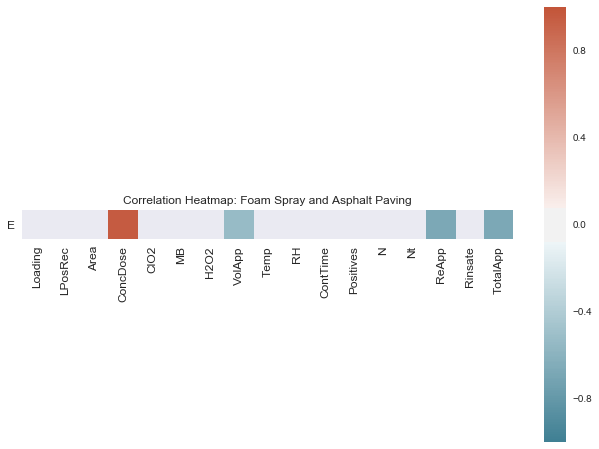

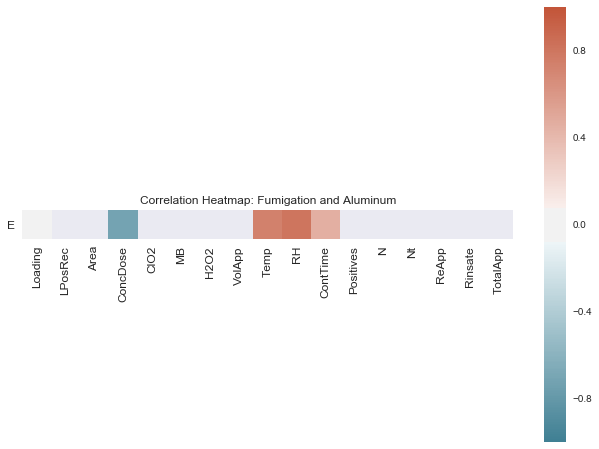

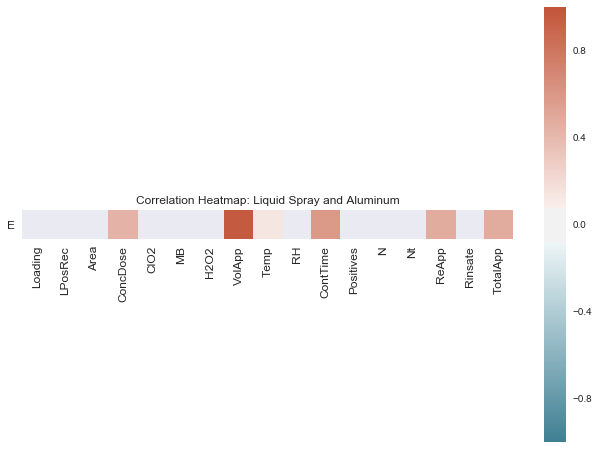

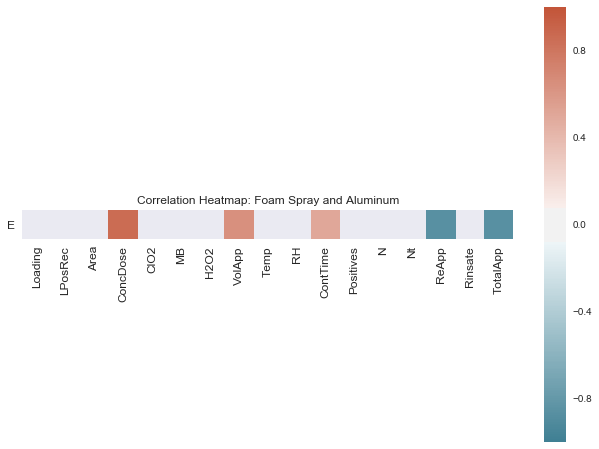

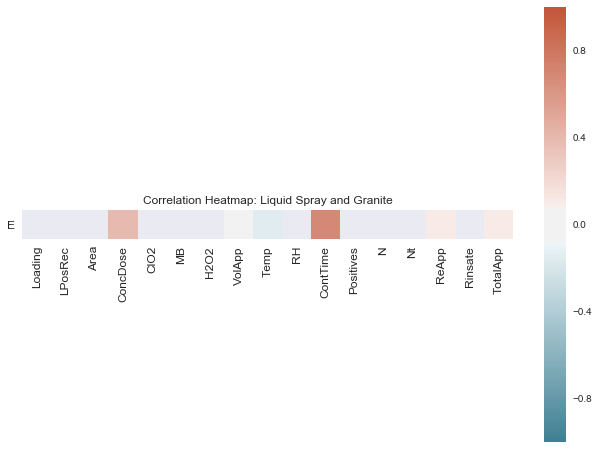

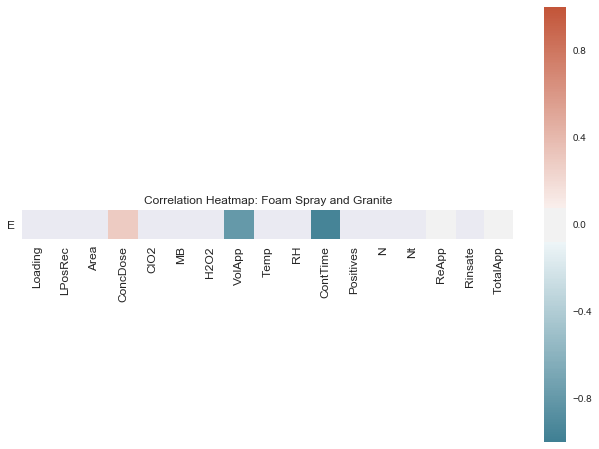

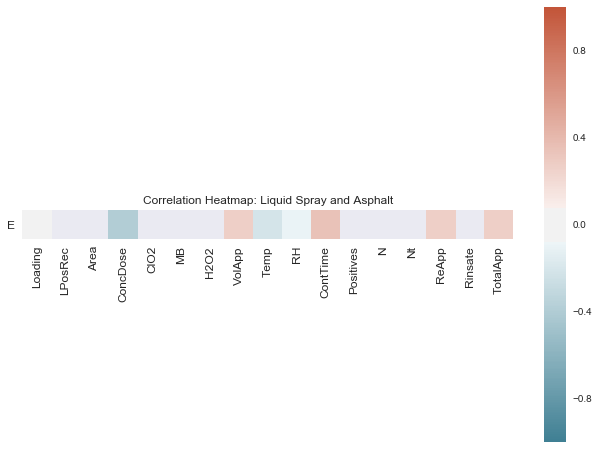

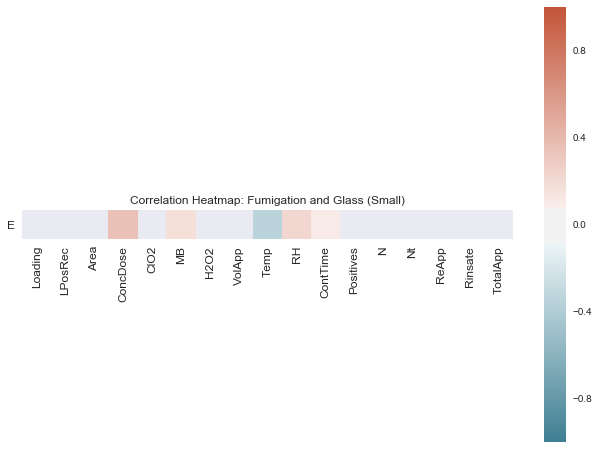

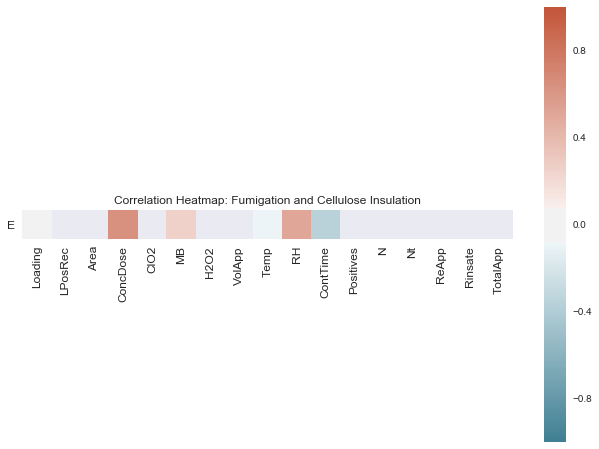

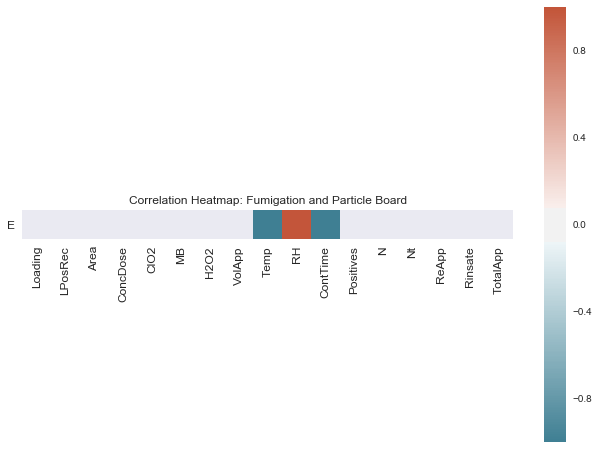

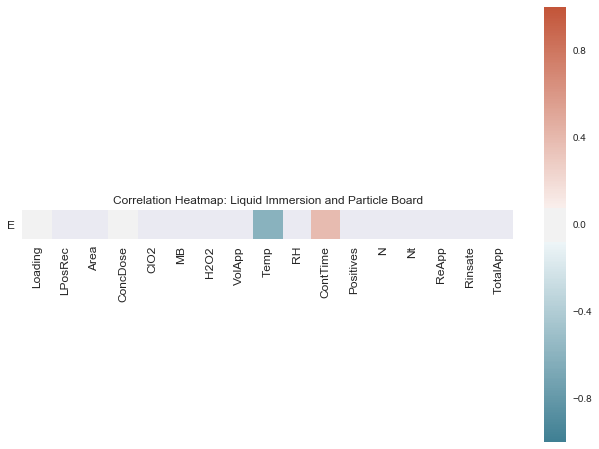

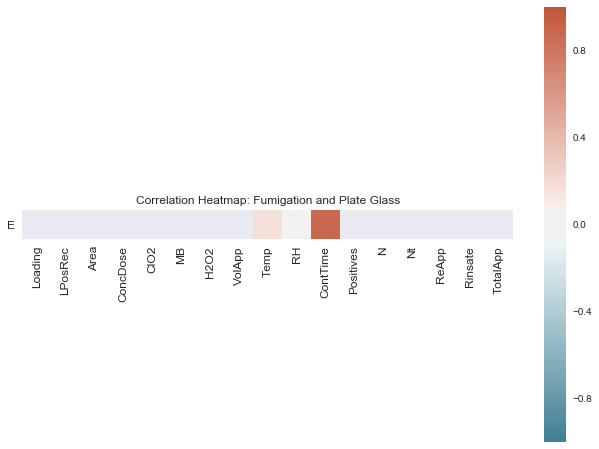

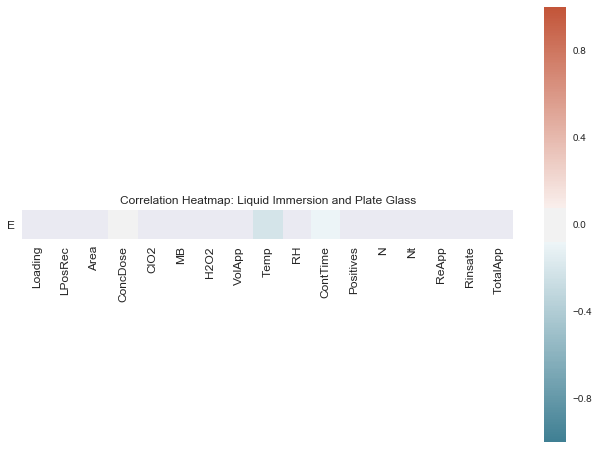

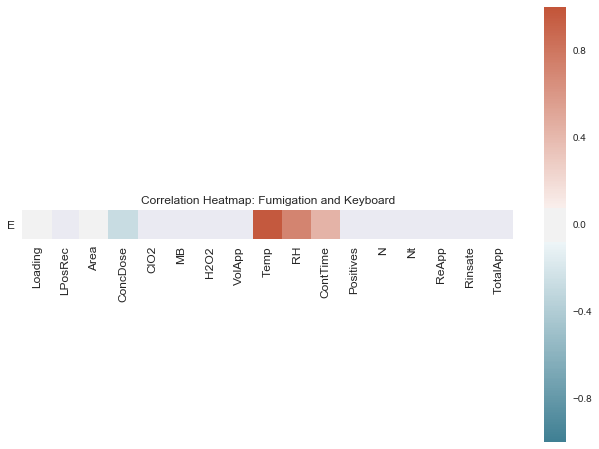

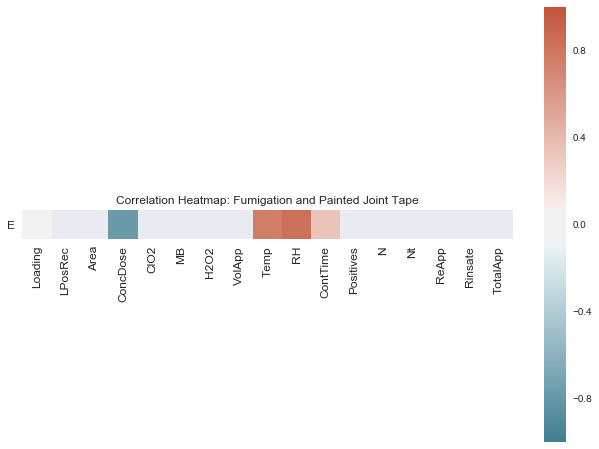

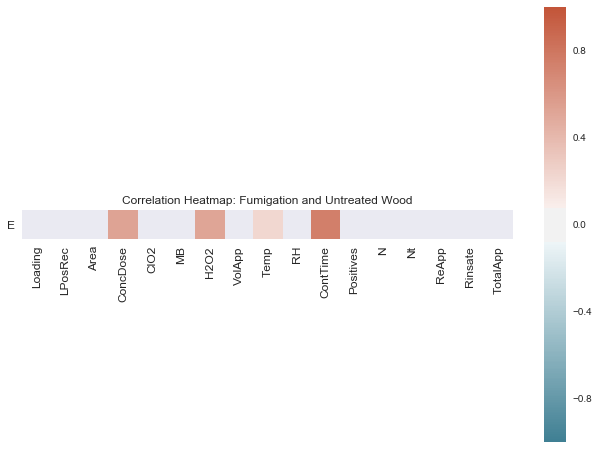

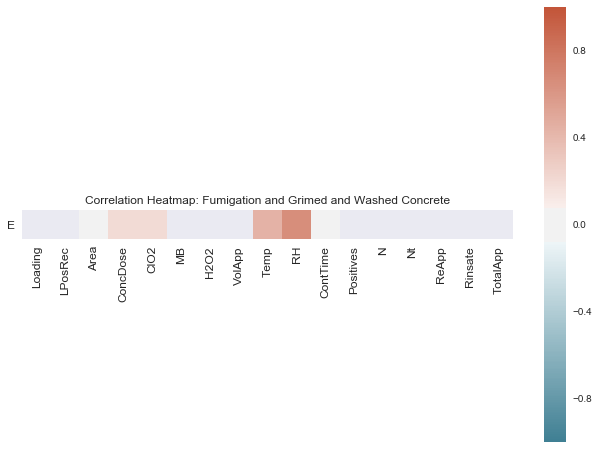

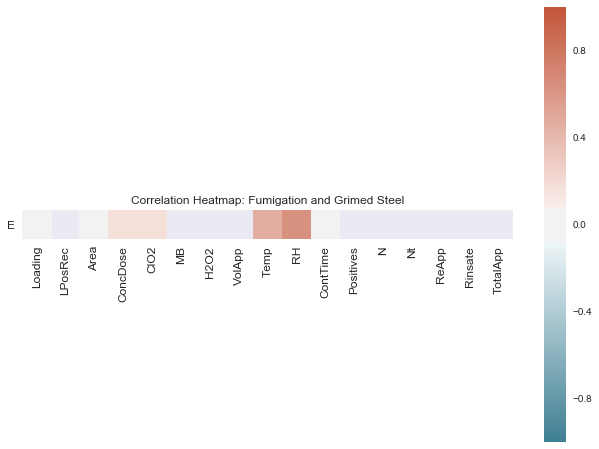

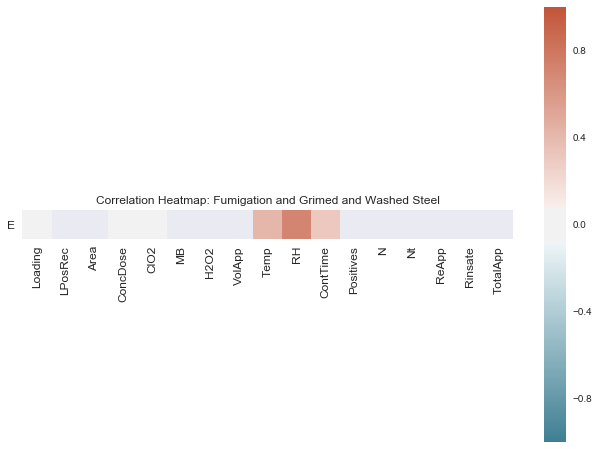

In [7]:
for surface in surfaces:
    for methodName in methods:
        title = " ".join([word.capitalize() for word in methodName.split(" ")])
        
        d1 = data[(data['AppMethod'] == methodName) & (data['Surface'] == surface)]
        
        if len(d1) > 0:
            correlation = d1.corr()

            for columnName in correlation.columns:
                if columnName != 'Eff':
                    correlation = correlation.drop(columnName)
        
            c1 = correlation.drop('Eff', axis=1)
            
            fig, ax = plt.subplots(figsize=(11,8))  

            sns.heatmap(c1, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True), square=True)
            
            ax.set_xticklabels(c1.columns, rotation=90, fontsize=12)
            ax.set_yticklabels('Eff', rotation=0, fontsize=12)
            ax.set_title('Correlation Heatmap: ' + title + ' and ' + surface)